In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv('DATA1.csv')

In [3]:
data.head(40000)

Unnamed: 0 Country Name    Time  \
0             0       Uganda  2003.0   
1             1       Uganda  2004.0   
2             2       Uganda  2005.0   
3             3       Uganda  2006.0   
4             4       Uganda  2007.0   
..          ...          ...     ...   
495         495      Tunisia  2018.0   
496         496      Tunisia  2019.0   
497         497      Tunisia  2020.0   
498         498      Tunisia  2021.0   
499         499      Tunisia  2022.0   

     Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]  \
0                                                  NaN               
1                                                  NaN               
2                                                  NaN               
3                                                  NaN               
4                                                  NaN               
..                                                 ...               
495                                                NaN               
496                                                NaN               
497                                                NaN               
498                                                NaN               
499                                                NaN               

     Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]  \
0                                            11.386725           
1                                            12.696881           
2                                            14.179700           
3                                            15.275413           
4                                            16.725069           
..                                                 ...           
495                                          45.485668           
496                                          45.950443           
497                                          37.991769           
498                                          42.013096           
499                                          51.429715           

     Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]  \
0                                             3.060332                          
1                                             3.720851                          
2                                             4.110826                          
3                                             6.457058                          
4                                             6.656597                          
..                                                 ...                          
495                                           2.322476                          
496                                           1.944881                          
497                                           1.466342                          
498                                           1.169375                          
499                                           1.442837                          

     GDP (current US$) [NY.GDP.MKTP.CD]  \
0                          6.606884e+09   
1                          7.939488e+09   
2                          9.239222e+09   
3                          9.977648e+09   
4                          1.190256e+10   
..                                  ...   
495                        4.268658e+10   
496                        4.190554e+10   
497                        4.249182e+10   
498                        4.681229e+10   
499                        4.457976e+10   

     GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]  \
0                                     6.473259   
1                                     6.807233   
2                                     6.332565   
3                                    10.784744   
4                                     8.412426   
..                                         ...   
495                                   2.624930   


In [4]:
def clean_column_names(col_name):
    return re.sub(r'\s*\[.*\]\s*', '', col_name)

cleaned_columns = {col: clean_column_names(col) for col in data.columns}
data.rename(columns=cleaned_columns, inplace=True)

In [5]:
data.columns

Index(['Unnamed: 0', 'Country Name', 'Time',
       'Central government debt, total (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Trade (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Gross capital formation (annual % growth)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Services, value added (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture (% of total employment)

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.columns

Index(['Country Name', 'Time', 'Central government debt, total (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Trade (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Gross capital formation (annual % growth)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Services, value added (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture (% of total employment) (modeled ILO estimat

In [8]:

time_column = data['Time']
df = data.copy()
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or col == 'Time'])

# Calc. summary statistics 
summary_statistics = df.describe().loc[['mean', '50%', 'std']]
summary_statistics.rename(index={'50%': 'median'}, inplace=True)

transposed_summary_statistics = summary_statistics.transpose()

formatted_summary_statistics = transposed_summary_statistics.applymap(lambda x: f'{x:.2f}')

formatted_summary_statistics

mean  \
Central government debt, total (% of GDP)                    42.77   
Exports of goods and services (% of GDP)                     27.93   
Foreign direct investment, net inflows (% of GDP)             2.82   
GDP (current US$)                                   55848038469.46   
GDP growth (annual %)                                         4.13   
GDP per capita (current US$)                               2301.60   
GDP per capita growth (annual %)                              1.76   
Inflation, GDP deflator (annual %)                            9.08   
Trade (% of GDP)                                             63.19   
Imports of goods and services (% of GDP)                     35.26   
Gross capital formation (annual % growth)                     8.07   
Agriculture, forestry, and fishing, value added...            3.34   
Unemployment, total (% of total labor force) (m...            8.57   
Services, value added (annual % growth)                       4.74   
Industry (including construction), value added ...            4.07   
Employment in services (% of total employment) ...           39.71   
Employment in industry (% of total employment) ...           15.28   
Employment in agriculture (% of total employmen...           45.01   
Mobile cellular subscriptions                          17983345.33   
Individuals using the Internet (% of population)             18.01   
Government Effectiveness: Estimate                           -0.53   
Regulatory Quality: Estimate                                 -0.46   
Urban population growth (annual %)                            3.63   
Control of Corruption: Estimate                              -0.53   
Net ODA received (% of GNI)                                   5.48   
School enrollment, tertiary (% gross)                        14.64   
Access to electricity (% of population)                      50.04   
Population growth (annual %)                                  2.34   
Population, total                                      26295853.92   

                                                            median  \
Central government debt, total (% of GDP)                    43.46   
Exports of goods and services (% of GDP)                     25.89   
Foreign direct investment, net inflows (% of GDP)             2.17   
GDP (current US$)                                   18744421056.44   
GDP growth (annual %)                                         4.37   
GDP per capita (current US$)                               1297.87   
GDP per capita growth (annual %)                              2.04   
Inflation, GDP deflator (annual %)                            5.68   
Trade (% of GDP)                                             59.14   
Imports of goods and services (% of GDP)                     33.04   
Gross capital formation (annual % growth)                     6.45   
Agriculture, forestry, and fishing, value added...            3.16   
Unemployment, total (% of total labor force) (m...            5.73   
Services, value added (annual % growth)                       5.12   
Industry (including construction), value added ...            3.76   
Employment in services (% of total employment) ...           41.82   
Employment in industry (% of total employment) ...           14.88   
Employment in agriculture (% of total employmen...           41.83   
Mobile cellular subscriptions                           9383734.00   
Individuals using the Internet (% of population)              9.00   
Government Effectiveness: Estimate                           -0.57   
Regulatory Quality: Estimate                                 -0.44   
Urban population growth (annual %)                            3.84   
Control of Corruption: Estimate                              -0.59   
Net ODA received (% of GNI)                                   3.90   
School enrollment, tertiary (% gross)                        10.62   
Access to electricity (% of population)                      43.90   
P

In [9]:
# missing values 
missing_values_count = data.isnull().sum()

# percentage of missing values 
total_entries = len(data)
missing_values_percentage = (missing_values_count / total_entries) * 100

missing_data_summary = pd.DataFrame({
    'Number of Missing Values': missing_values_count,
    'Percentage of Missing Values': missing_values_percentage
})

missing_data_summary


Number of Missing Values  \
Country Name                                                               0   
Time                                                                       0   
Central government debt, total (% of GDP)                                434   
Exports of goods and services (% of GDP)                                   0   
Foreign direct investment, net inflows (% of GDP)                          2   
GDP (current US$)                                                          0   
GDP growth (annual %)                                                      0   
GDP per capita (current US$)                                               0   
GDP per capita growth (annual %)                                           0   
Inflation, GDP deflator (annual %)                                         0   
Trade (% of GDP)                                                           0   
Imports of goods and services (% of GDP)                                   0   
Gross capital formation (annual % growth)                                 28   
Agriculture, forestry, and fishing, value added...                         4   
Unemployment, total (% of total labor force) (m...                         0   
Services, value added (annual % growth)                                    8   
Industry (including construction), value added ...                        12   
Employment in services (% of total employment) ...                         0   
Employment in industry (% of total employment) ...                         0   
Employment in agriculture (% of total employmen...                         0   
Mobile cellular subscriptions                                              3   
Individuals using the Internet (% of population)                          35   
Government Effectiveness: Estimate                                         0   
Regulatory Quality: Estimate                                               0   
Urban population growth (annual %)                                         0   
Control of Corruption: Estimate                                            0   
Net ODA received (% of GNI)                                                0   
School enrollment, tertiary (% gross)                                     97   
Access to electricity (% of population)                                    0   
Population growth (annual %)                                               0   
Population, total                                                          0   

                                                    Percentage of Missing Values  
Country Name                                                                 0.0  
Time                                                                         0.0  
Central government debt, total (% of GDP)                                   86.8  
Exports of goods and services (% of GDP)                                     0.0  
Foreign direct investment, net inflows (% of GDP)                            0.4  
GDP (current US$)                                                            0.0  
GDP growth (annual %)                                                        0.0  
GDP per capita (current US$)                                                 0.0  
GDP per capita growth (annual %)                                             0.0  
Inflation, GDP deflator (annual %)                                           0.0  
Trade (% of GDP)                                                             0.0  
Imports of goods and services (% of GDP)                                     0.0  
Gross capital formation (annual % growth)                                    5.6  
Agriculture, forestry, and fishing, value added...                           0.8  
Unemployment, total (% of total labor force) (m...                           0.0  
Services, value added (annual % growth)                                      1.6  
Industry (including construction), value added ...                           2.4

In [10]:
custom_variables = [
    'GDP (current US$)', 
    'GDP growth (annual %)', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Access to electricity (% of population)', 
    'Inflation, GDP deflator (annual %)'
]

average_values = data.groupby('Time')[custom_variables].mean().reset_index()


In [11]:
country_means = data.groupby('Country Name')[custom_variables].mean().mean(axis=1)

top_performer = country_means.idxmax()
bottom_performer = country_means.idxmin()

median_value = country_means.median()
middle_performer = (country_means - median_value).abs().idxmin()  # Find the country closest to the median

print("Top performer:", top_performer)
print("Bottom performer:", bottom_performer)
print("Middle performer:", middle_performer)


Top performer: South Africa
Bottom performer: Burundi
Middle performer: Uganda


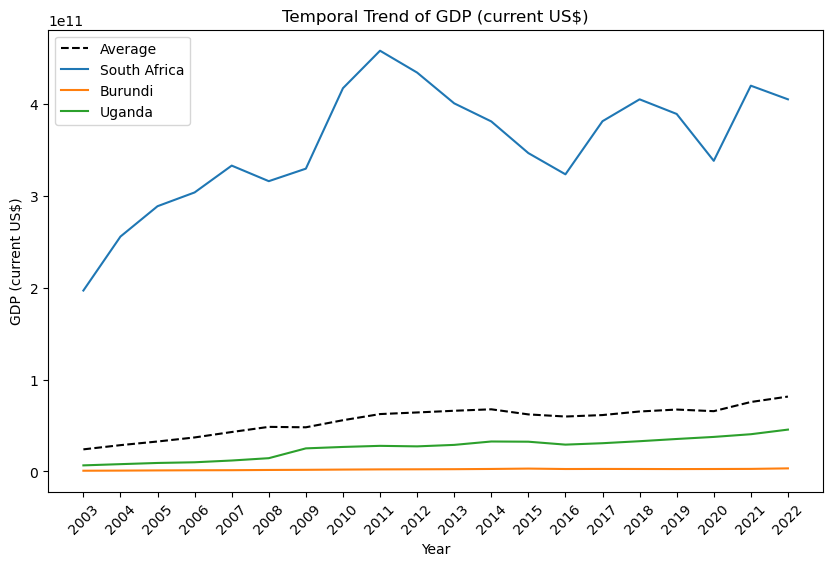

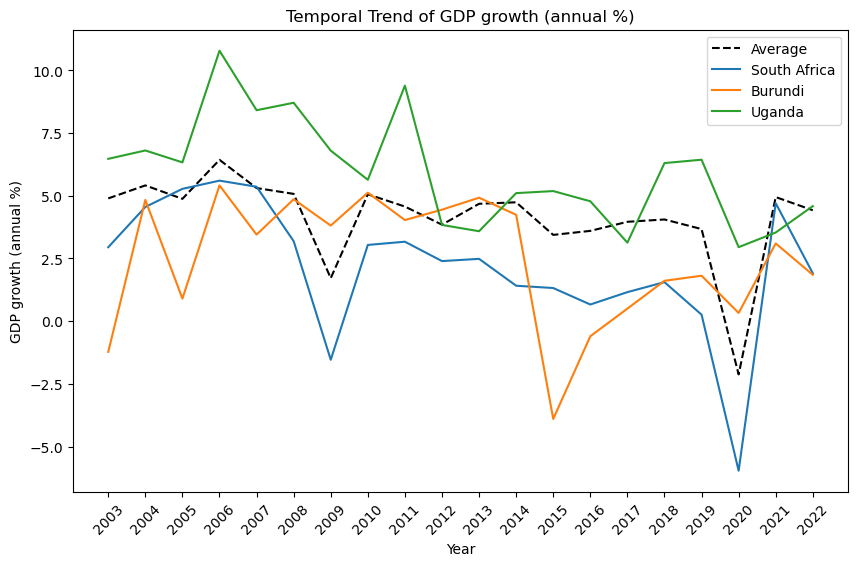

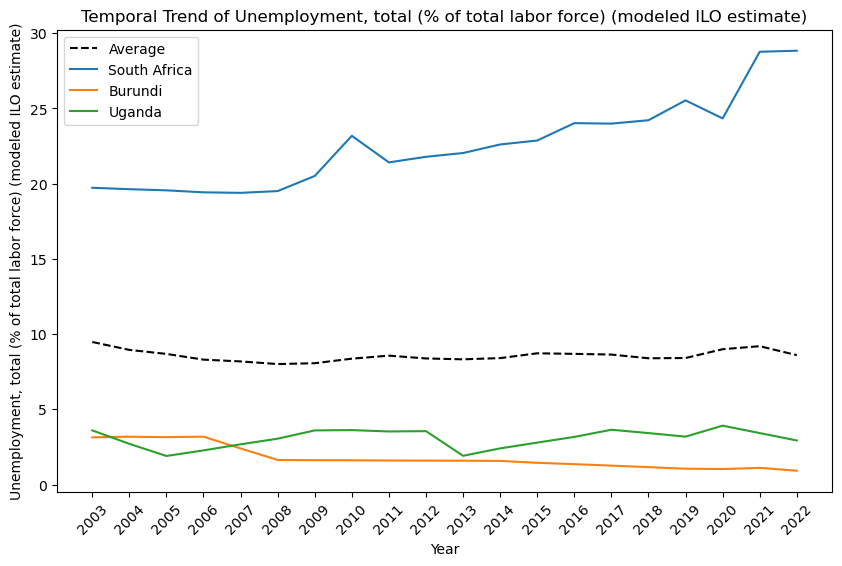

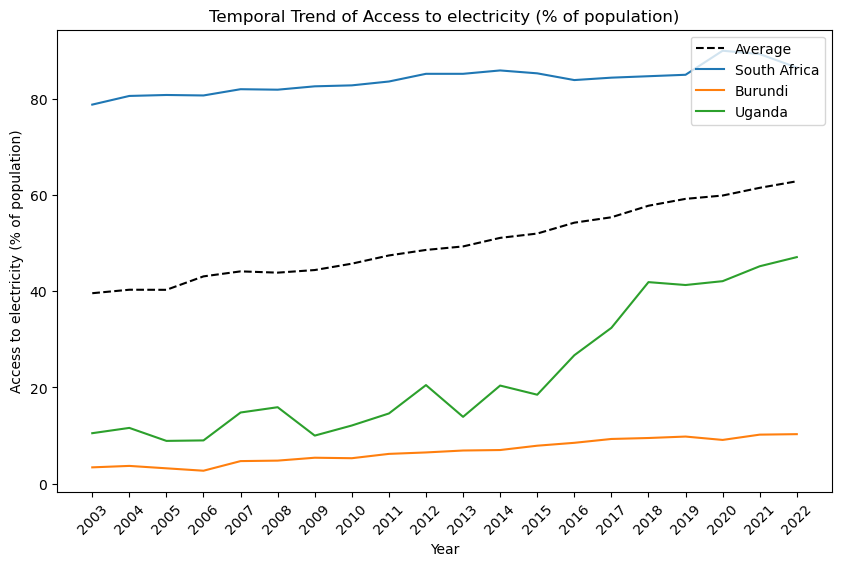

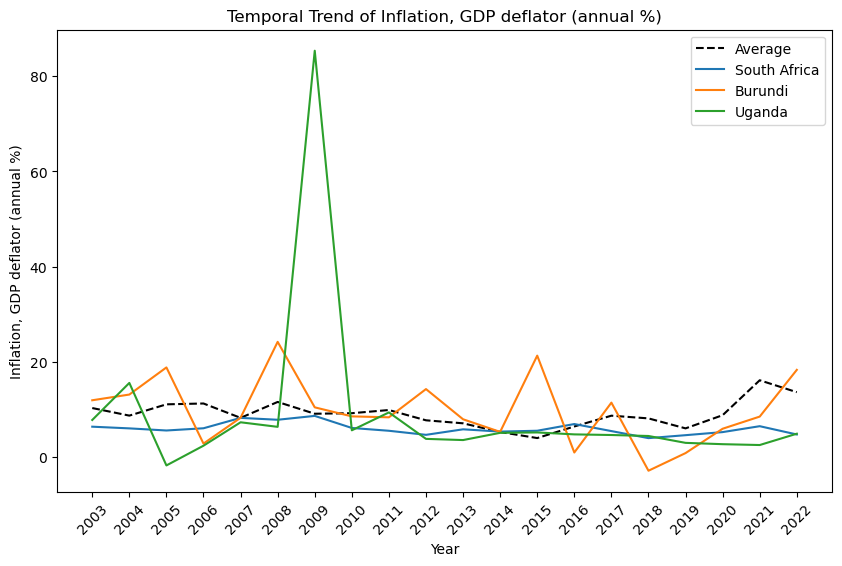

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Time'] = pd.to_numeric(data['Time'], errors='coerce')

# temporal trends
def plot_temporal_trends(variable):
    plt.figure(figsize=(10, 6))
    
    sns.lineplot(x='Time', y=variable, data=average_values, label='Average', color='black', linestyle='--')
    
    top_data = data[data['Country Name'] == top_performer]
    sns.lineplot(x='Time', y=variable, data=top_data, label=top_performer)
    
    bottom_data = data[data['Country Name'] == bottom_performer]
    sns.lineplot(x='Time', y=variable, data=bottom_data, label=bottom_performer)
    
    middle_data = data[data['Country Name'] == middle_performer]
    sns.lineplot(x='Time', y=variable, data=middle_data, label=middle_performer)
    
    plt.xticks(ticks=data['Time'].unique(), rotation=45)
    
    plt.title(f'Temporal Trend of {variable}')
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.legend()
    plt.show()

for variable in custom_variables:
    plot_temporal_trends(variable)


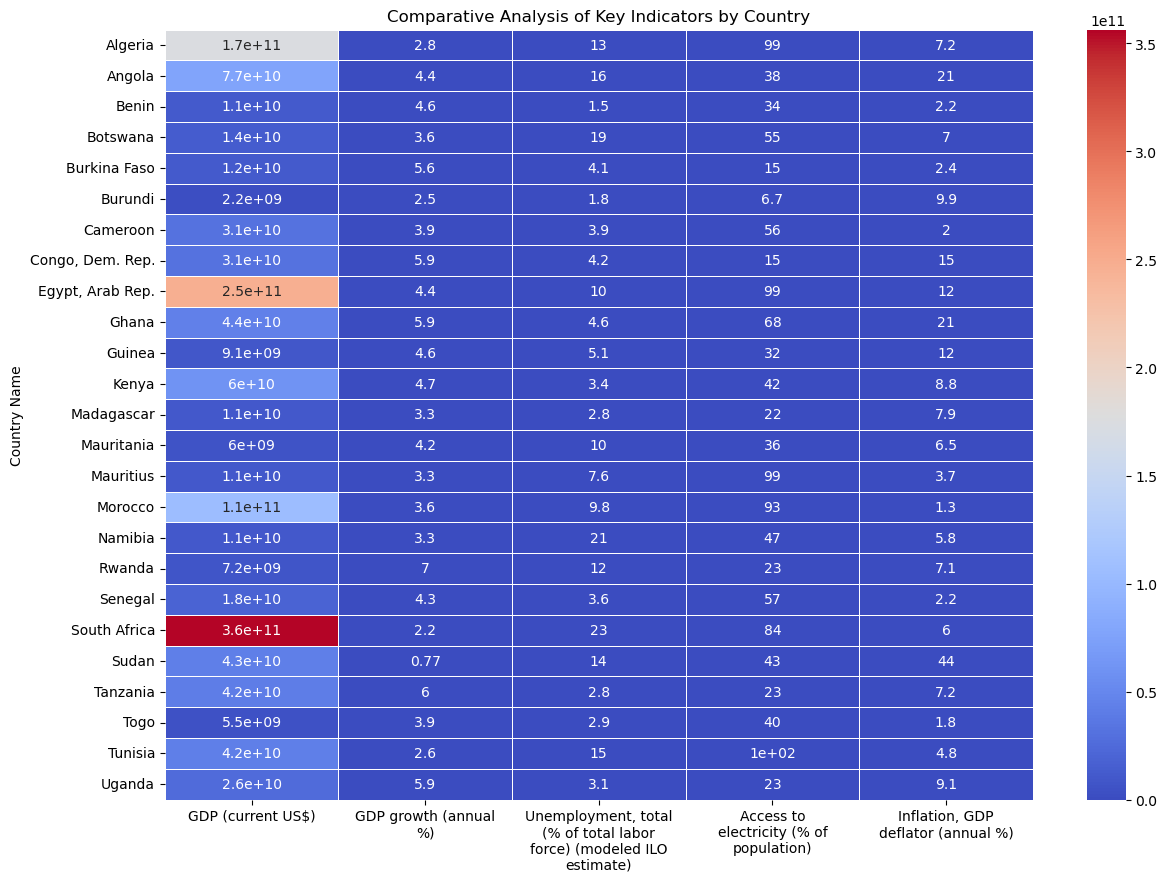

In [13]:
import textwrap
custom_variables = [
    'GDP (current US$)', 
    'GDP growth (annual %)', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Access to electricity (% of population)', 
    'Inflation, GDP deflator (annual %)'
]

mean_values = data.groupby('Country Name')[custom_variables].mean()

#  heatmap 
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(mean_values, annot=True, cmap='coolwarm', linewidths=.5)

xticks_labels = [textwrap.fill(text, 20) for text in mean_values.columns]
plt.xticks(ticks=plt.xticks()[0], labels=xticks_labels, rotation=0, ha='center')

plt.title('Comparative Analysis of Key Indicators by Country')
plt.show()


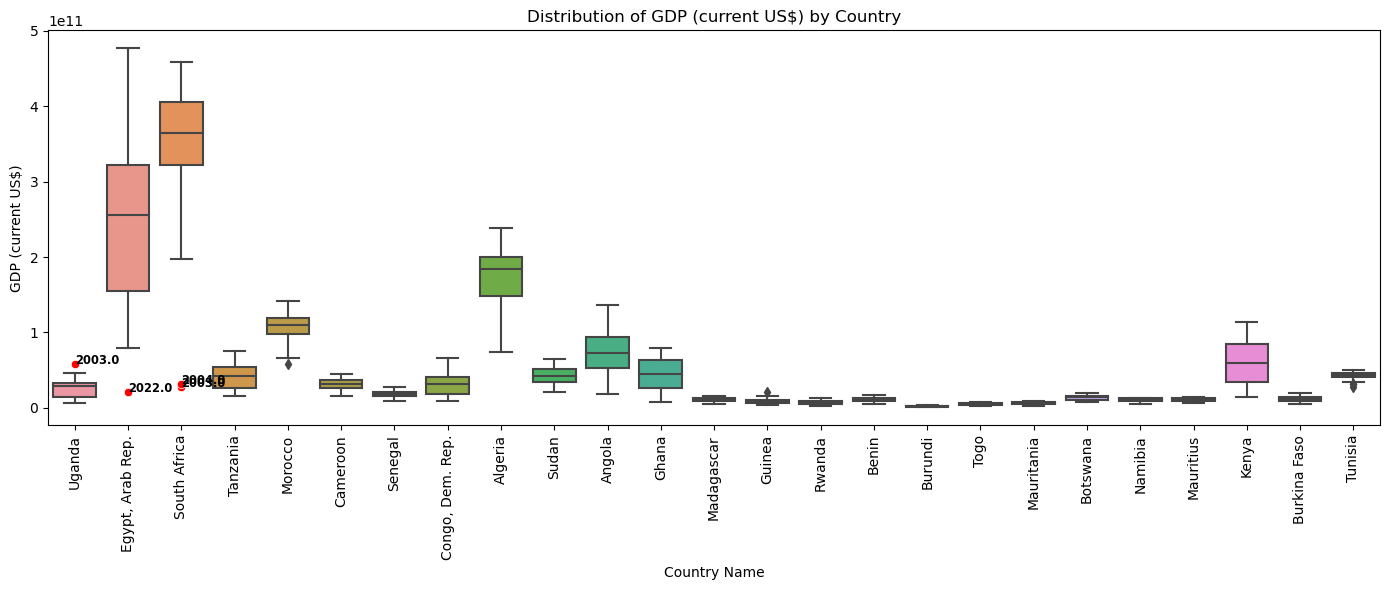

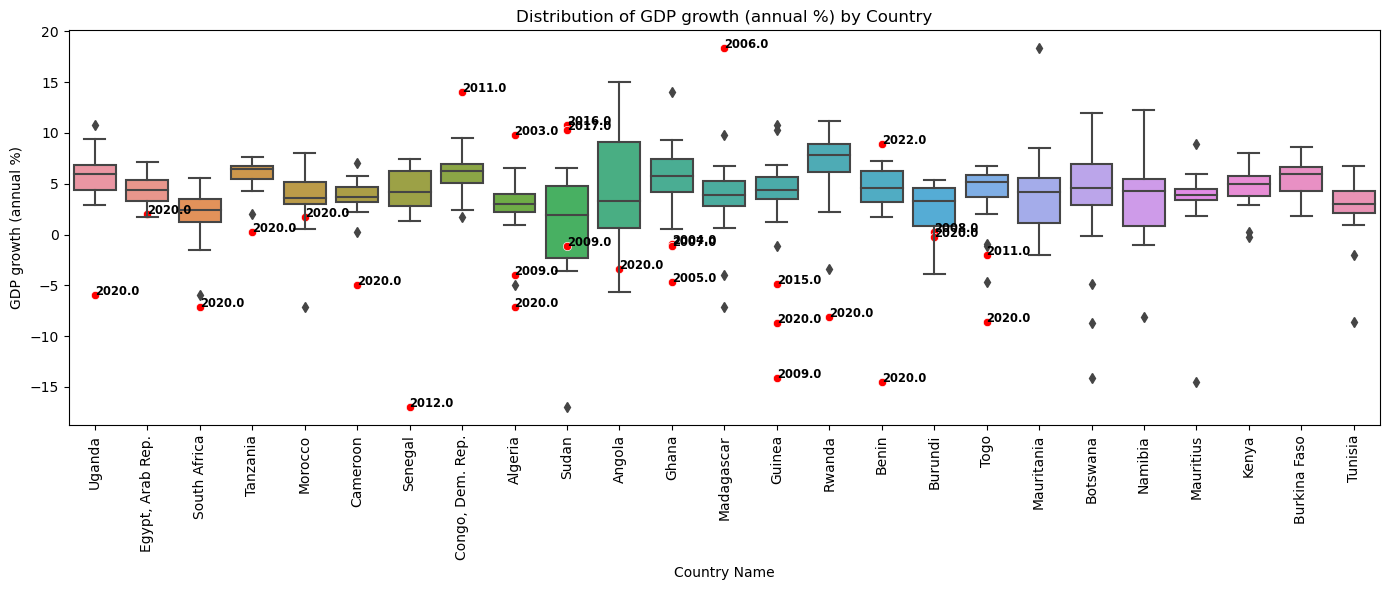

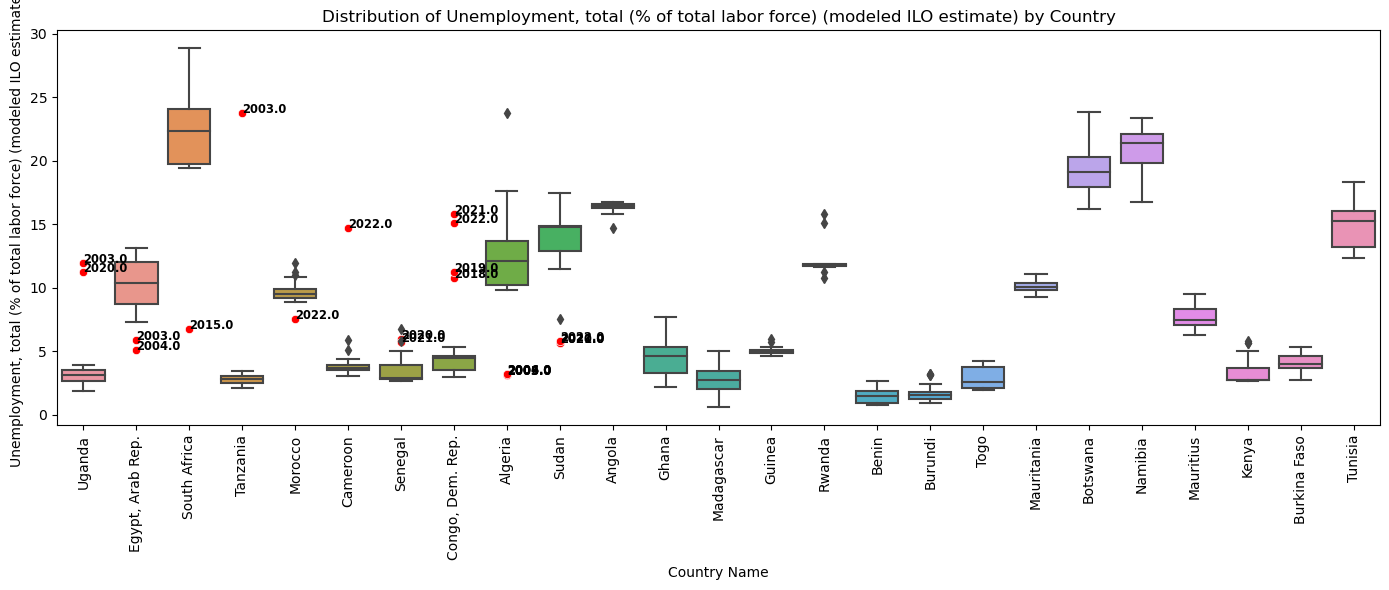

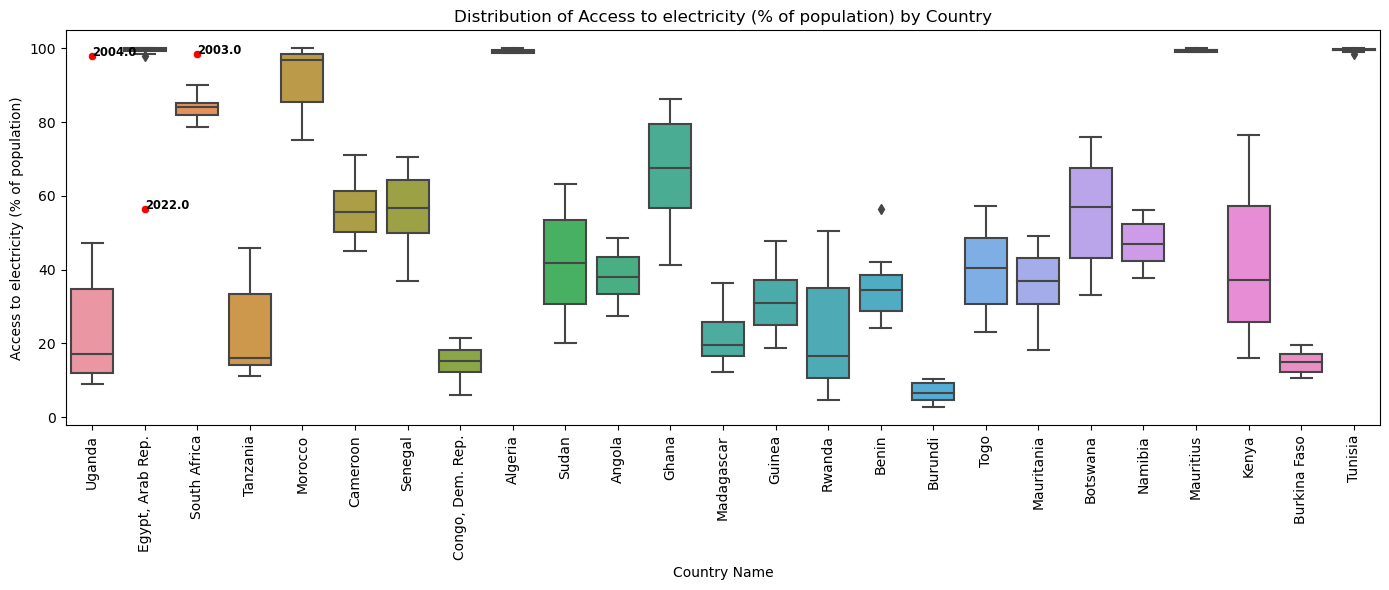

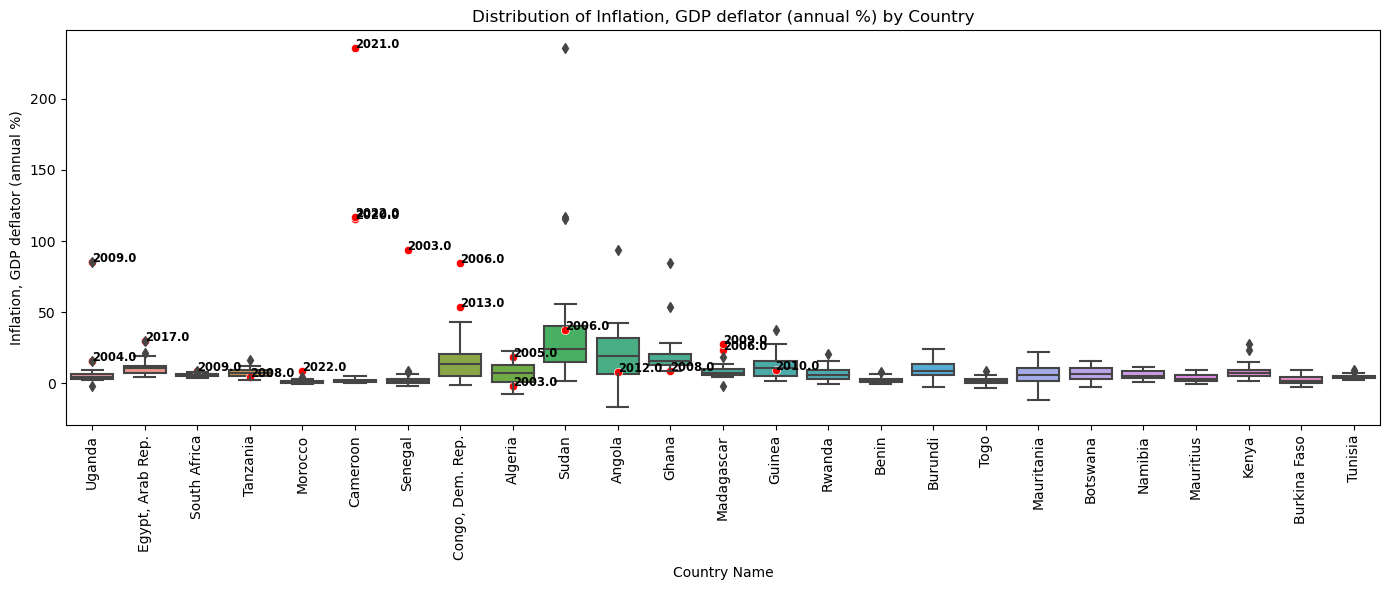

In [14]:
custom_variables = [
    'GDP (current US$)', 
    'GDP growth (annual %)', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Access to electricity (% of population)', 
    'Inflation, GDP deflator (annual %)'
]

# box plots 
def plot_box_with_years(data, variable):
    plt.figure(figsize=(14, 6))
    
    sns.boxplot(x='Country Name', y=variable, data=data)
    plt.title(f'Distribution of {variable} by Country')
    plt.xticks(rotation=90)
    
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        Q1 = country_data[variable].quantile(0.25)
        Q3 = country_data[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.75 * IQR
        upper_bound = Q3 + 1.75 * IQR
        
        significant_outliers = country_data[(country_data[variable] < lower_bound) | 
                                            (country_data[variable] > upper_bound)]
        
        sns.scatterplot(x=[country] * len(significant_outliers), y=significant_outliers[variable], color='red')
        
        for i in range(len(significant_outliers)):
            plt.text(country, significant_outliers[variable].iloc[i], significant_outliers['Time'].iloc[i], 
                     horizontalalignment='left', size='small', color='black', weight='semibold')
    
    plt.tight_layout()
    plt.show()

for variable in custom_variables:
    plot_box_with_years(data, variable)



In [15]:
numeric_data = data.drop(columns=['Country Name', 'Time'])

correlation_matrix = numeric_data.corr()

print("Cleaned column names:")
print(data.columns)

print("Correlation matrix:")
print(correlation_matrix)


Cleaned column names:
Index(['Country Name', 'Time', 'Central government debt, total (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Inflation, GDP deflator (annual %)', 'Trade (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Gross capital formation (annual % growth)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Services, value added (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in agriculture (% of total employment

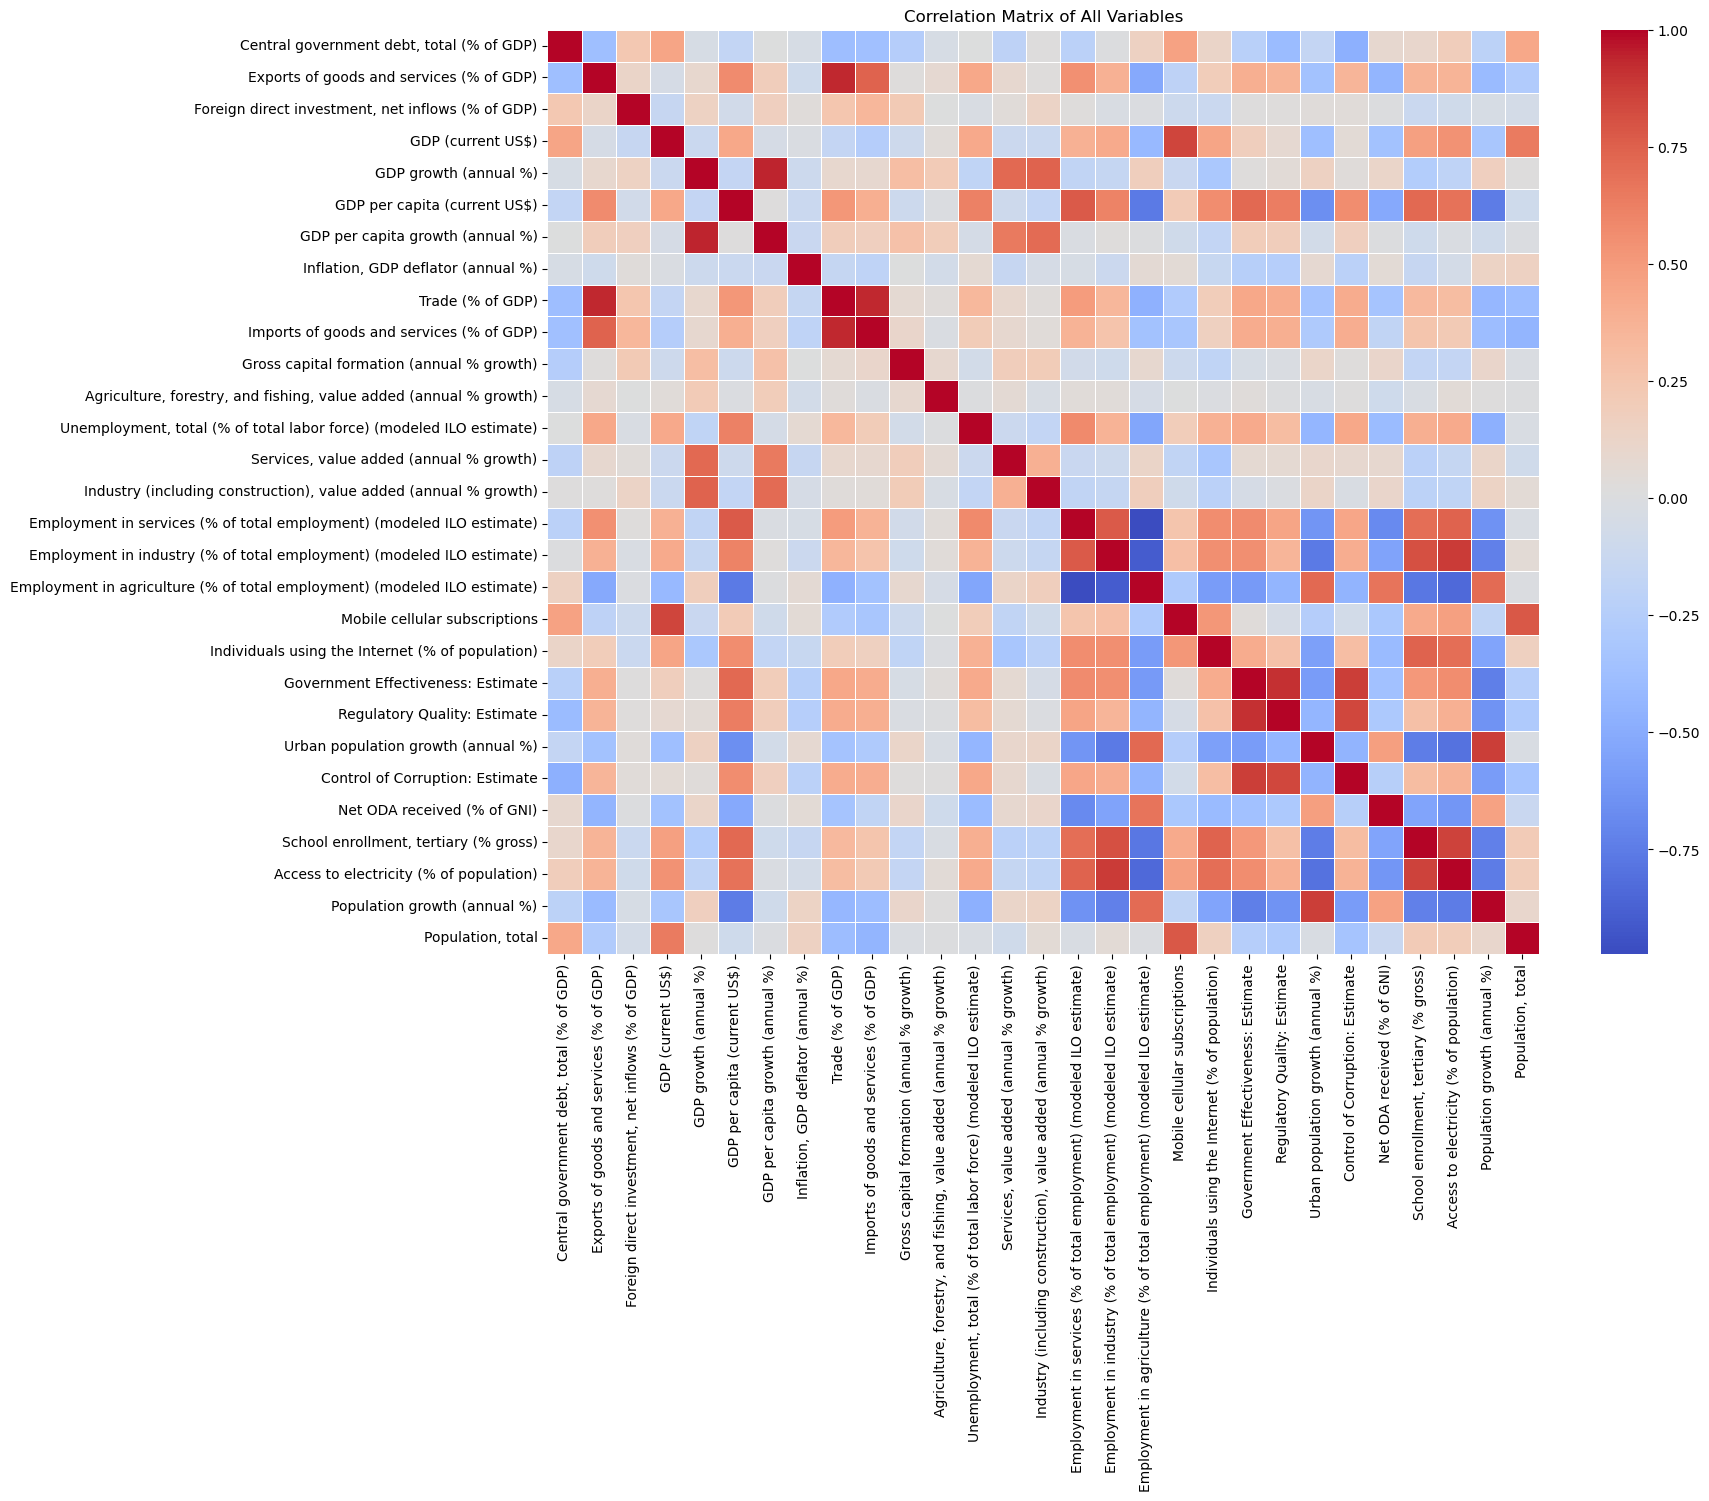

In [16]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of All Variables')
plt.show()


In [17]:
# correlated pairs
threshold = 0.8
very_high_corr_pairs = correlation_matrix.unstack().reset_index()
very_high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
very_high_corr_pairs = very_high_corr_pairs[
    (very_high_corr_pairs['Variable1'] != very_high_corr_pairs['Variable2']) &
    (np.abs(very_high_corr_pairs['Correlation']) >= threshold)
]

very_high_corr_pairs = very_high_corr_pairs[
    very_high_corr_pairs.apply(frozenset, axis=1).duplicated(keep='first') == False
]

print("Very strongly correlated pairs of variables:")
very_high_corr_pairs



Very strongly correlated pairs of variables:


Variable1  \
37            Exports of goods and services (% of GDP)   
105                                  GDP (current US$)   
122                              GDP growth (annual %)   
241                                   Trade (% of GDP)   
452  Employment in services (% of total employment)...   
481  Employment in industry (% of total employment)...   
489  Employment in industry (% of total employment)...   
490  Employment in industry (% of total employment)...   
519  Employment in agriculture (% of total employme...   
601                 Government Effectiveness: Estimate   
603                 Government Effectiveness: Estimate   
632                       Regulatory Quality: Estimate   
665                 Urban population growth (annual %)   
751              School enrollment, tertiary (% gross)   

                                             Variable2  Correlation  
37                                    Trade (% of GDP)     0.935794  
105                      Mobile cellular subscriptions     0.852411  
122                   GDP per capita growth (annual %)     0.944435  
241           Imports of goods and services (% of GDP)     0.932451  
452  Employment in agriculture (% of total employme...    -0.972505  
481  Employment in agriculture (% of total employme...    -0.896661  
489              School enrollment, tertiary (% gross)     0.807542  
490            Access to electricity (% of population)     0.877576  
519            Access to electricity (% of population)    -0.834204  
601                       Regulatory Quality: Estimate     0.910110  
603                    Control of Corruption: Estimate     0.874438  
632                    Control of Corruption: Estimate     0.844699  
665                       Population growth (annual %)     0.869055  
751            Access to electricity (% of population)     0.861127

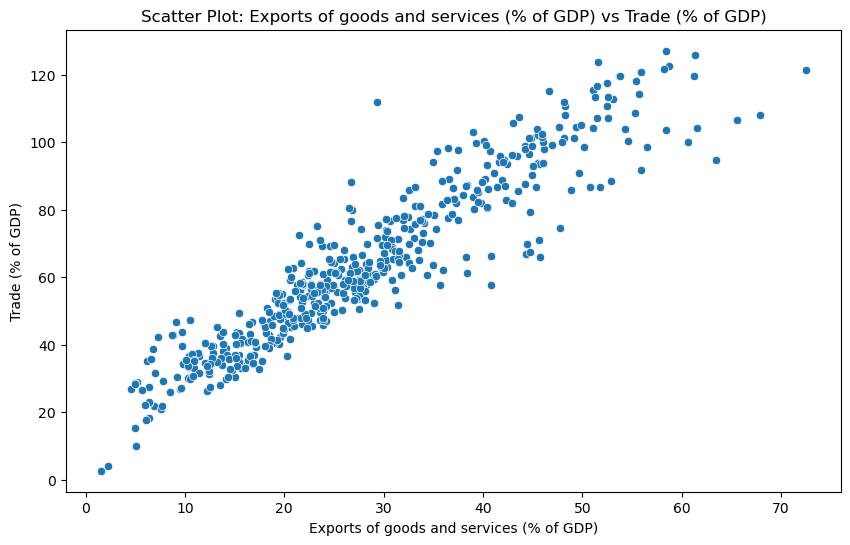

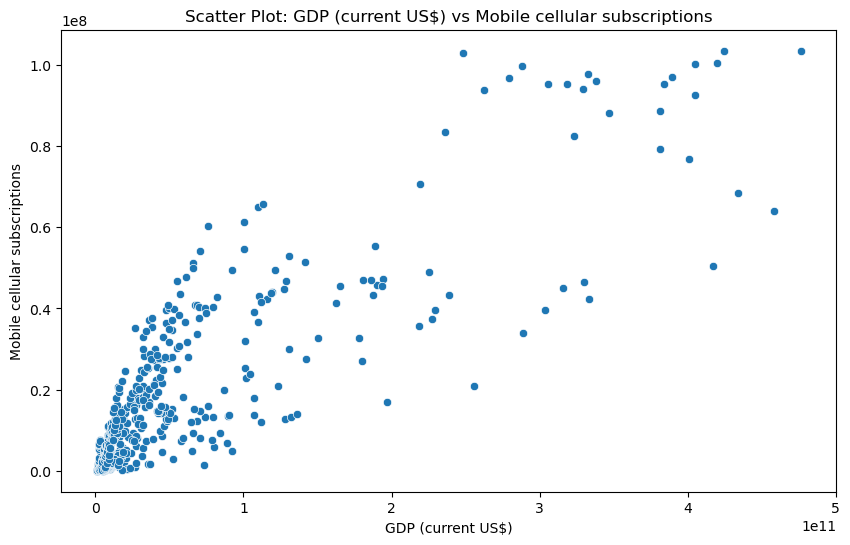

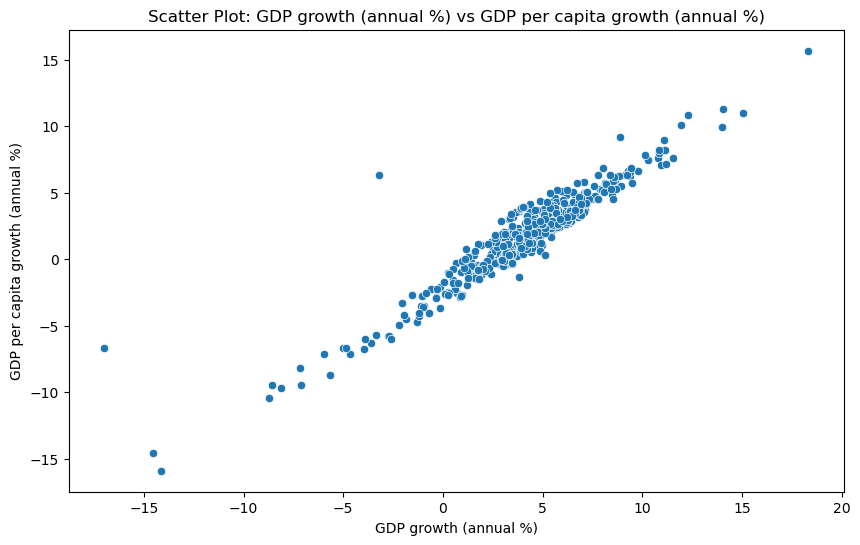

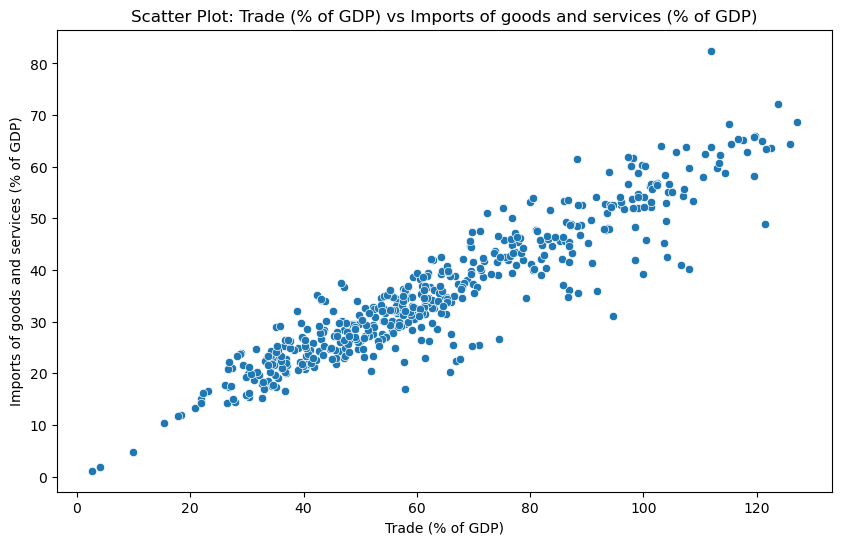

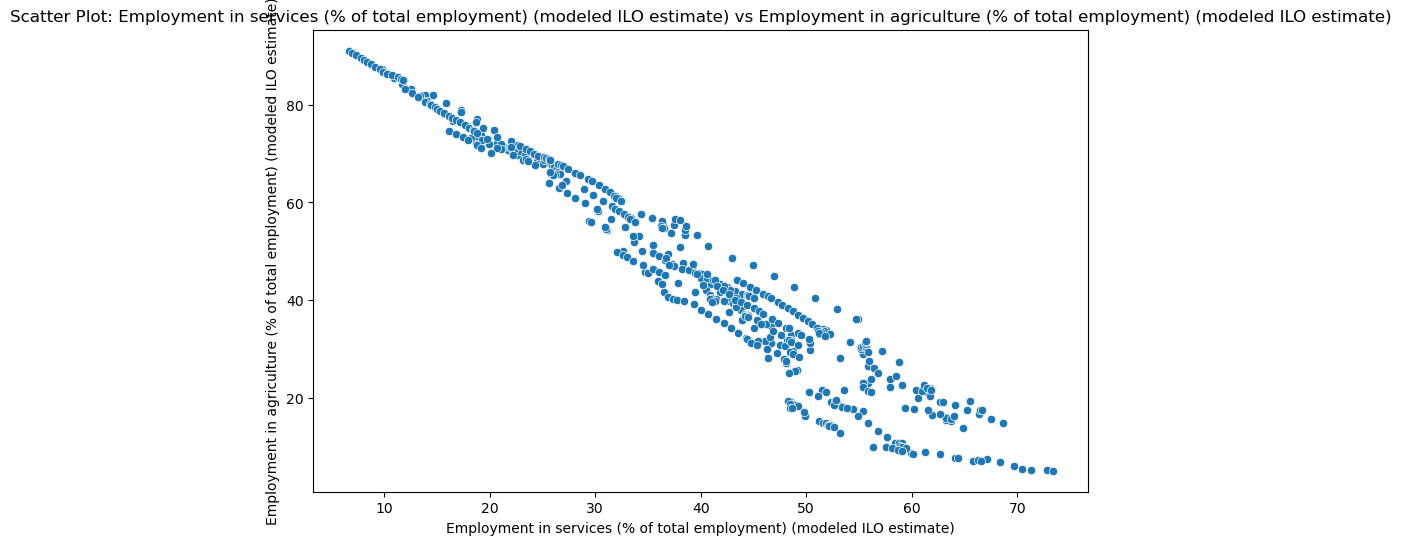

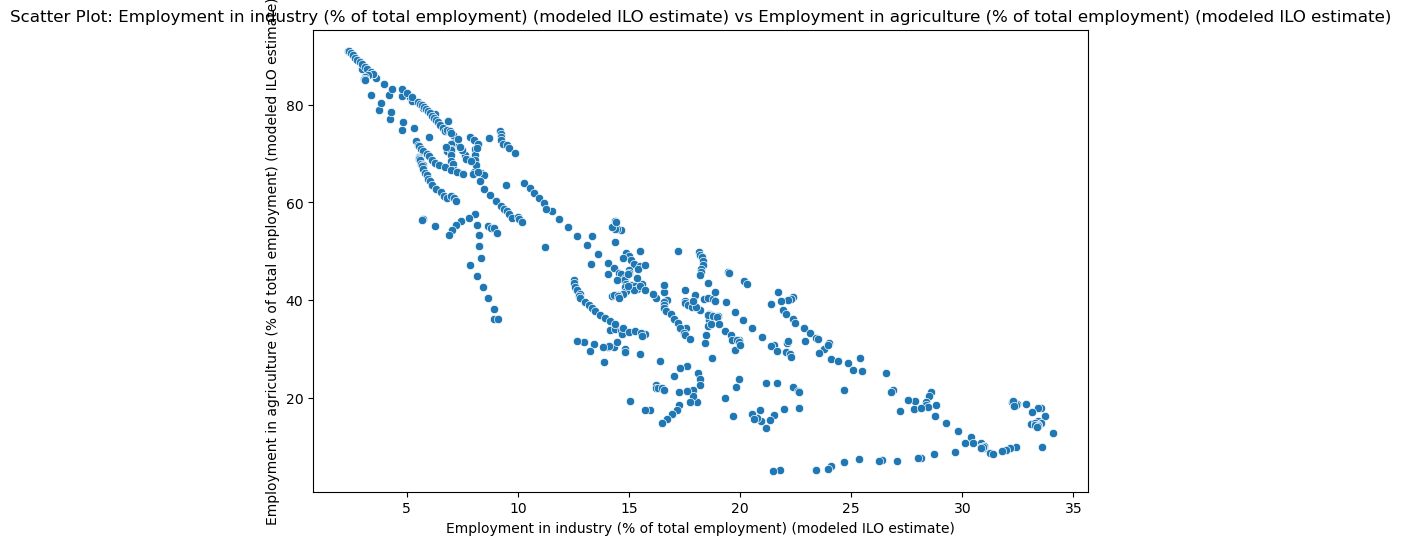

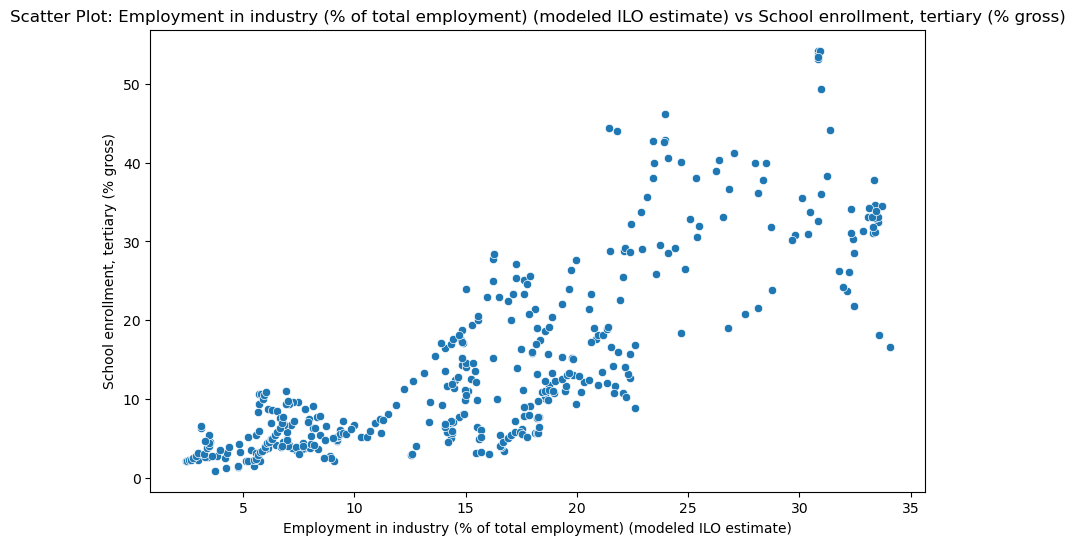

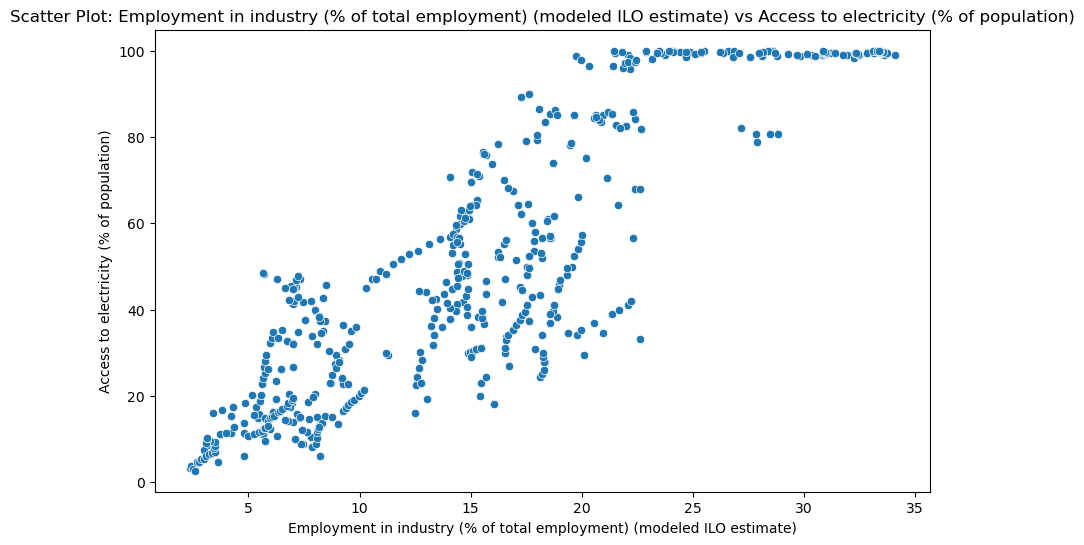

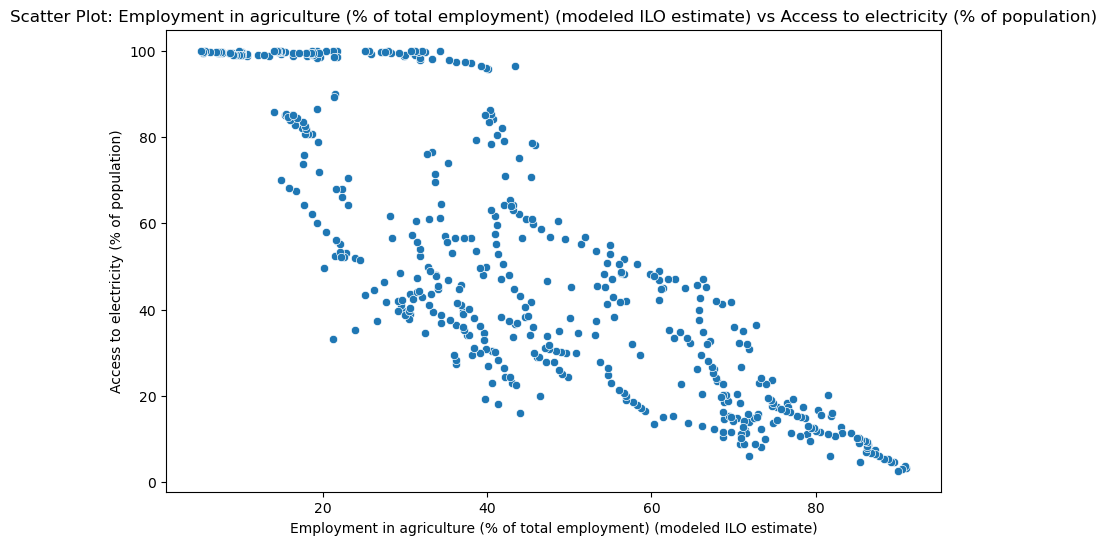

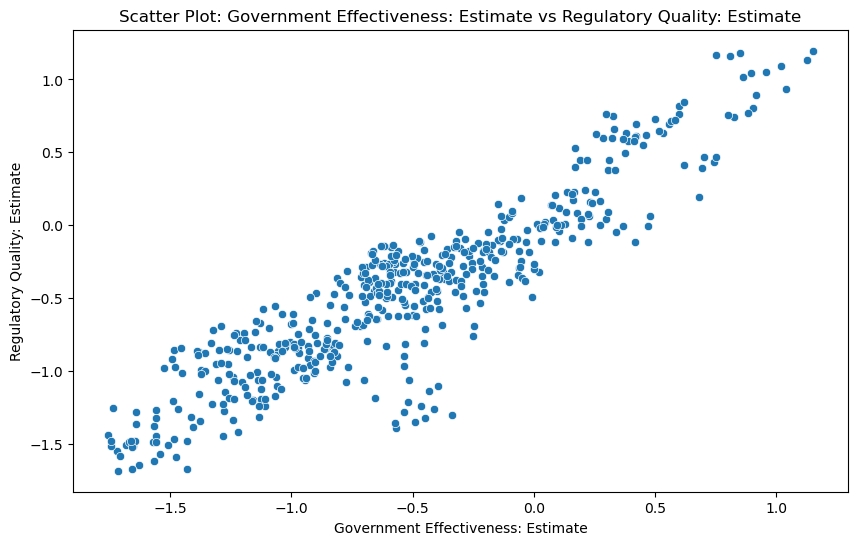

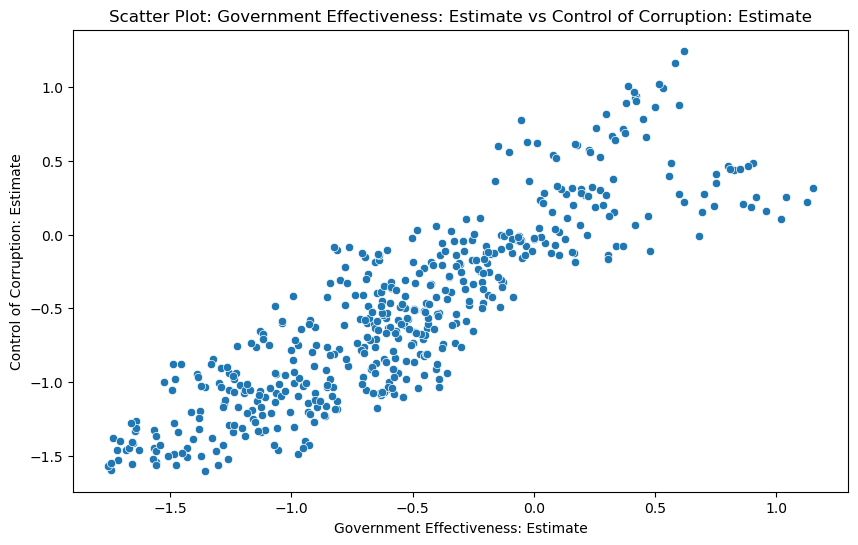

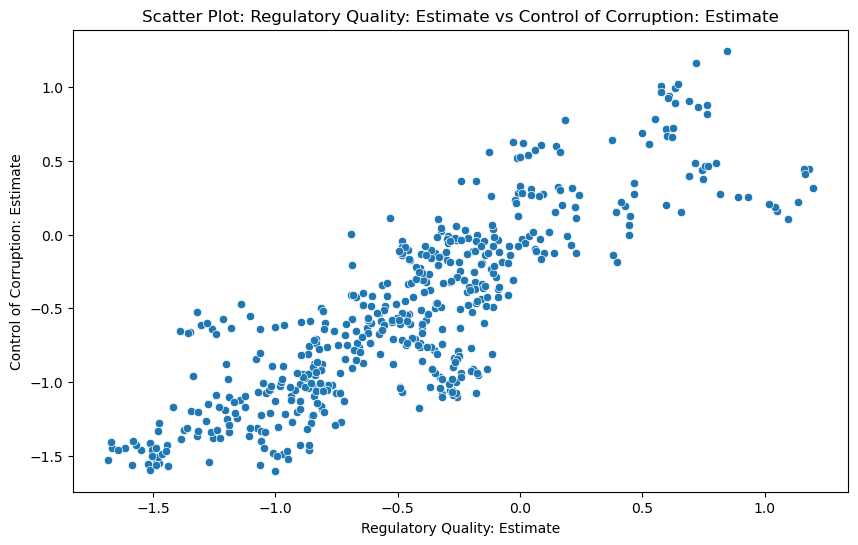

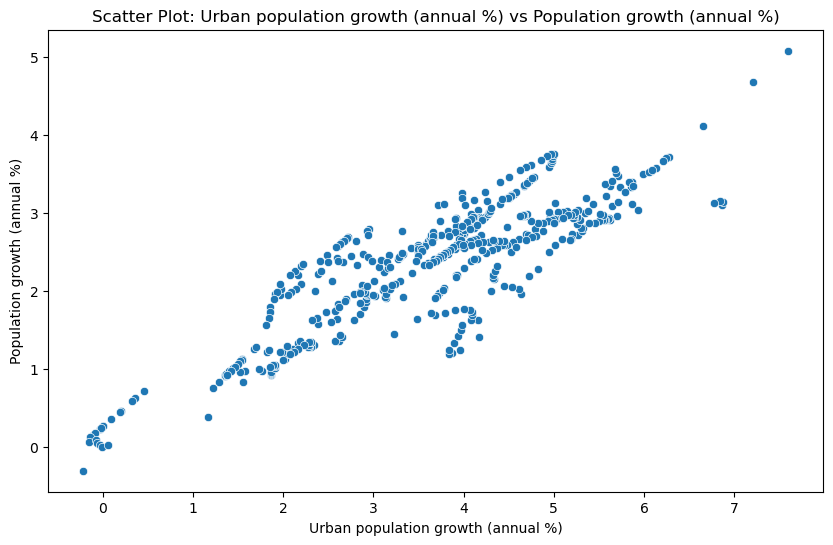

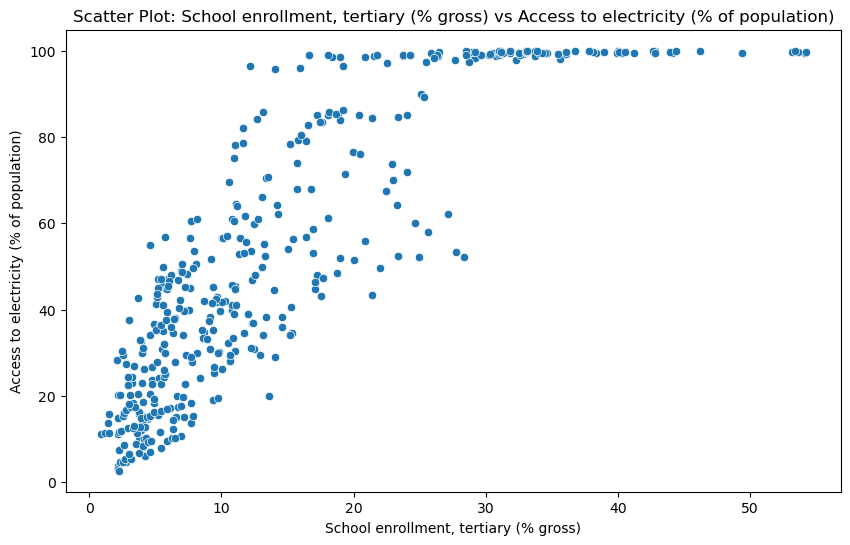

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter plots 
def plot_scatter_pairs(data, pairs):
    for index, row in pairs.iterrows():
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=row['Variable1'], y=row['Variable2'], data=data)
        plt.title(f'Scatter Plot: {row["Variable1"]} vs {row["Variable2"]}')
        plt.xlabel(row['Variable1'])
        plt.ylabel(row['Variable2'])
        plt.show()

plot_scatter_pairs(data, very_high_corr_pairs)


/var/folders/n7/10c67z5x7f34c4lv0zkn_5m40000gn/T/ipykernel_61248/1512296706.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


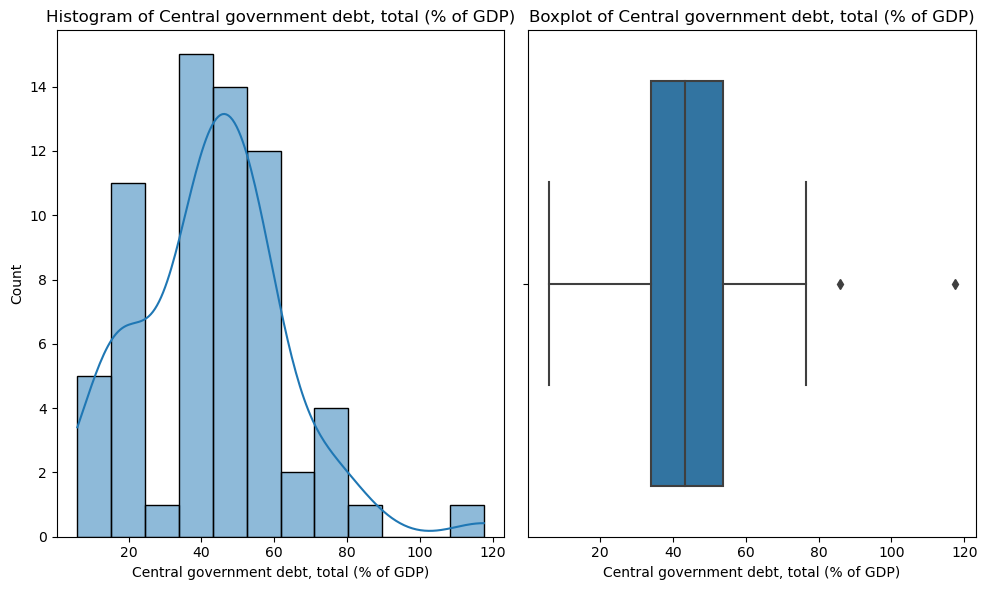

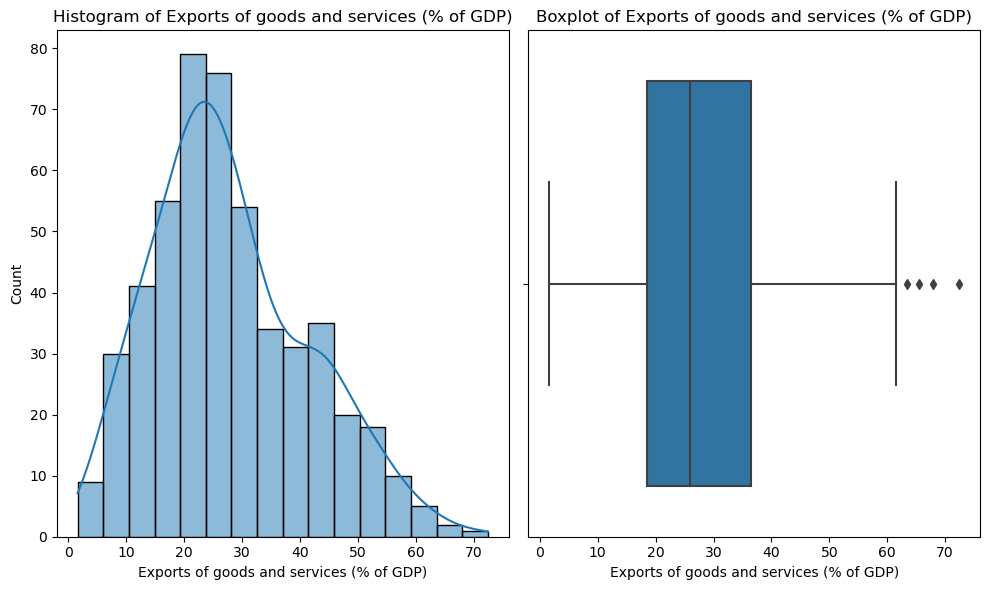

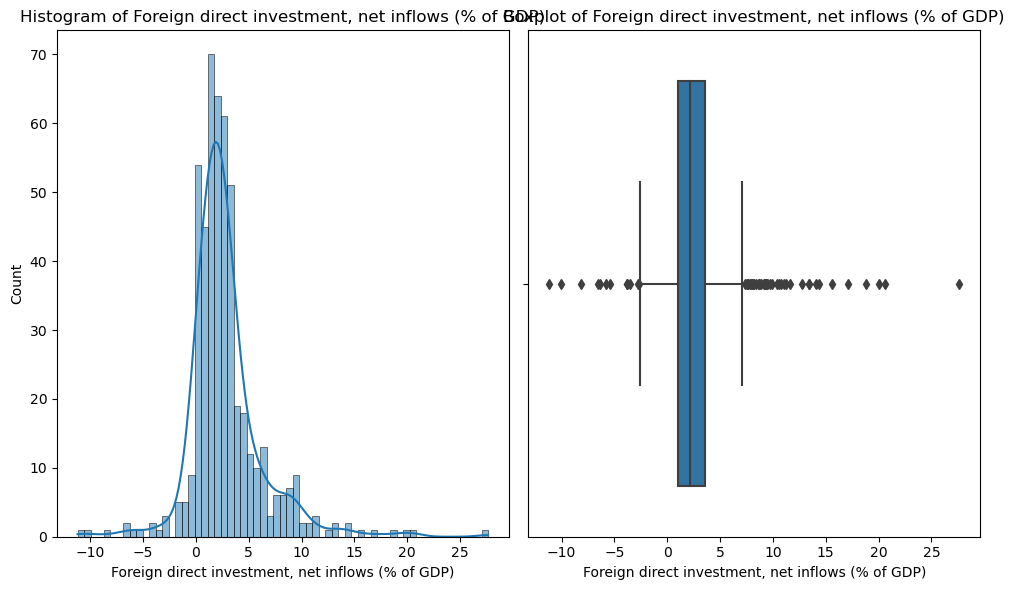

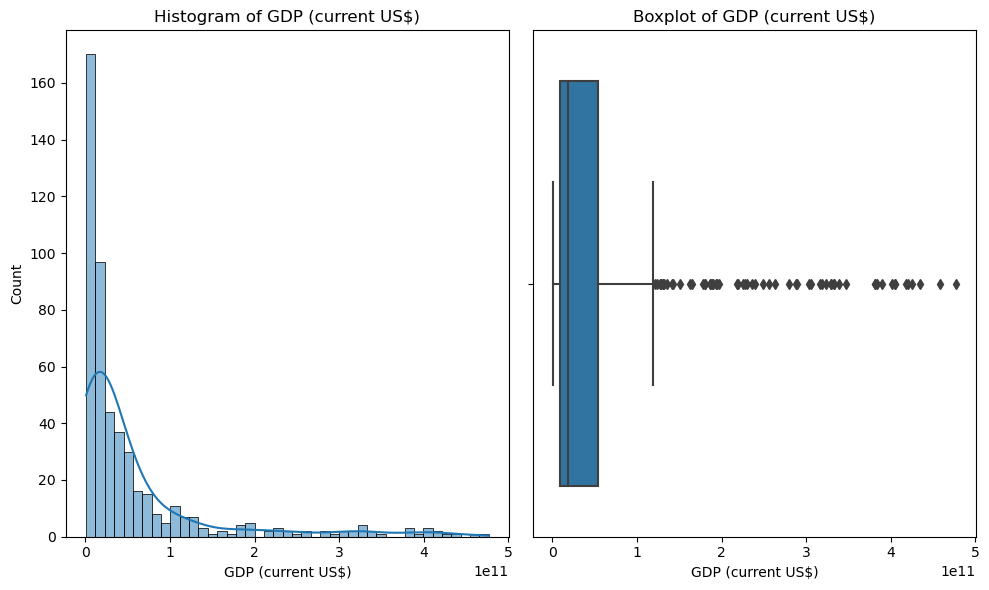

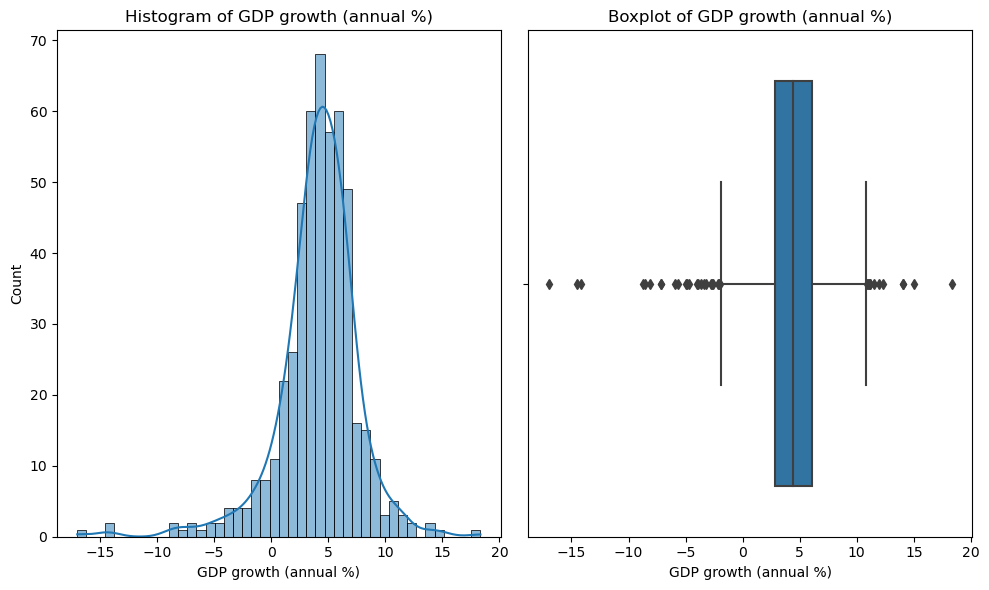

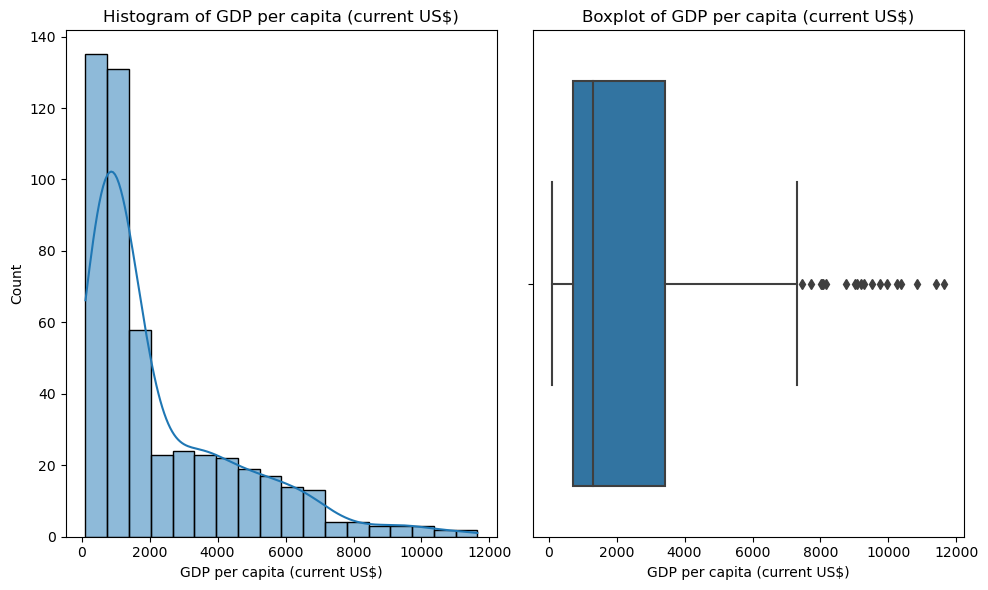

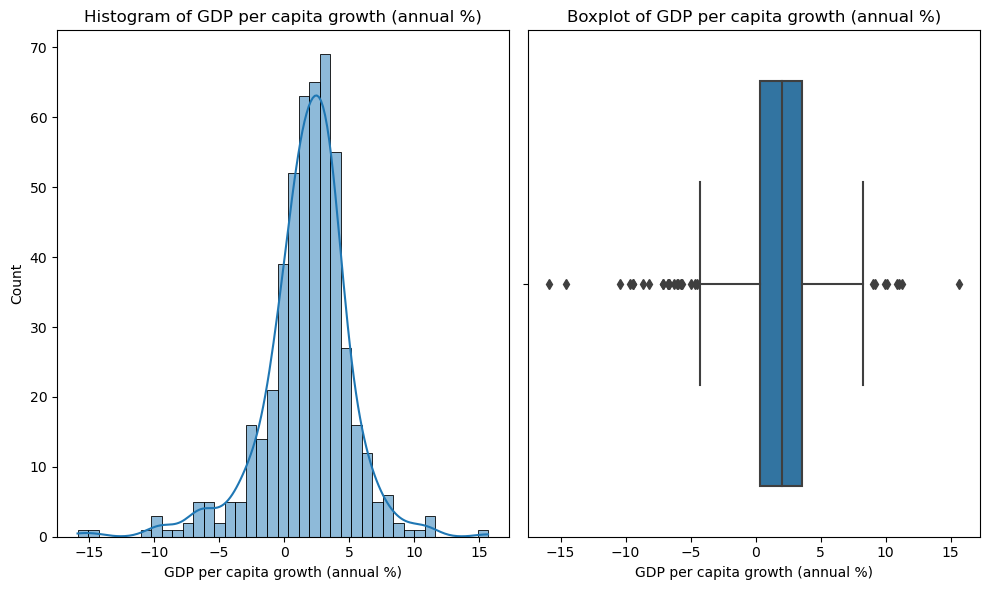

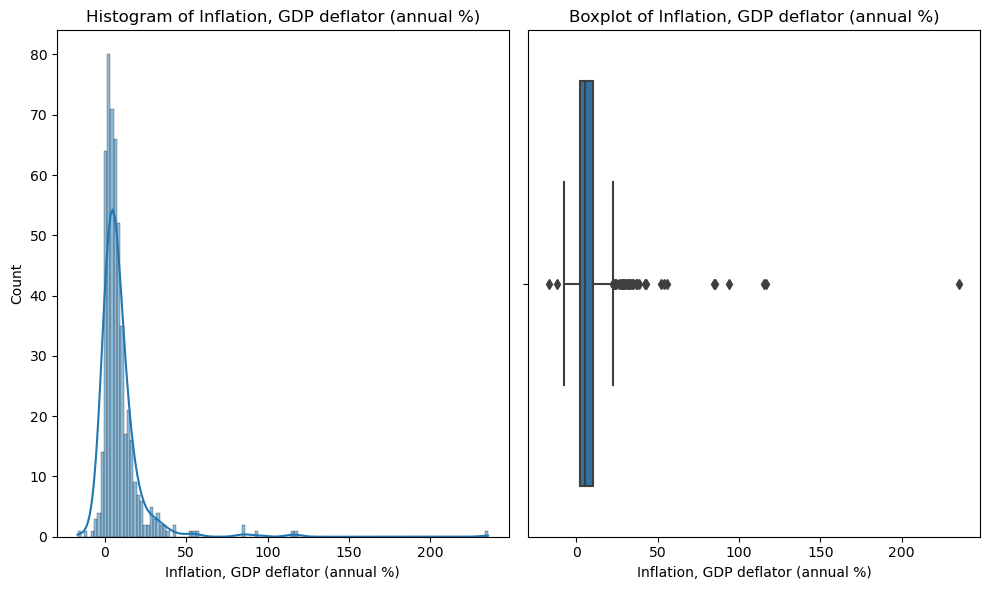

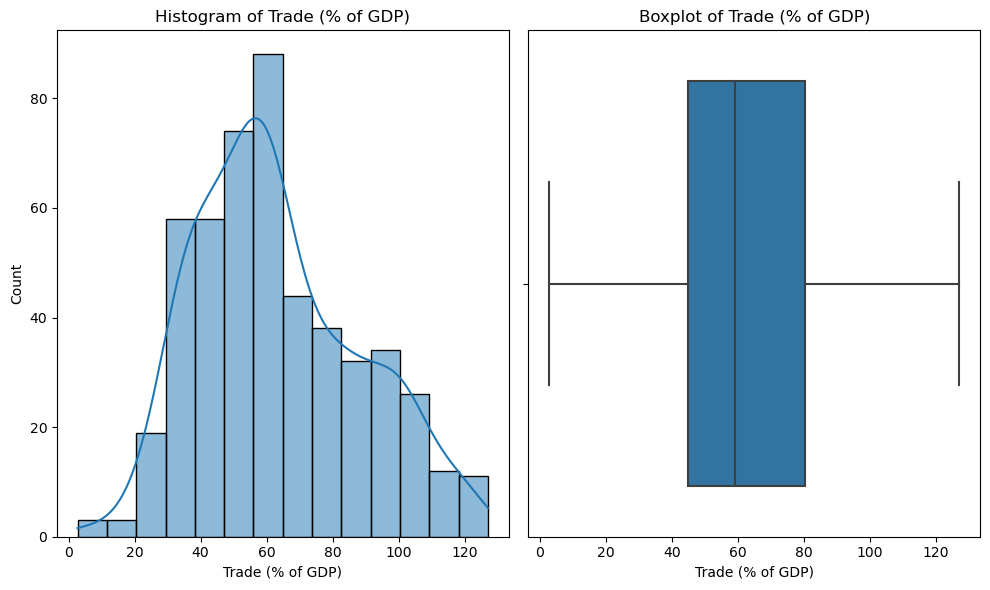

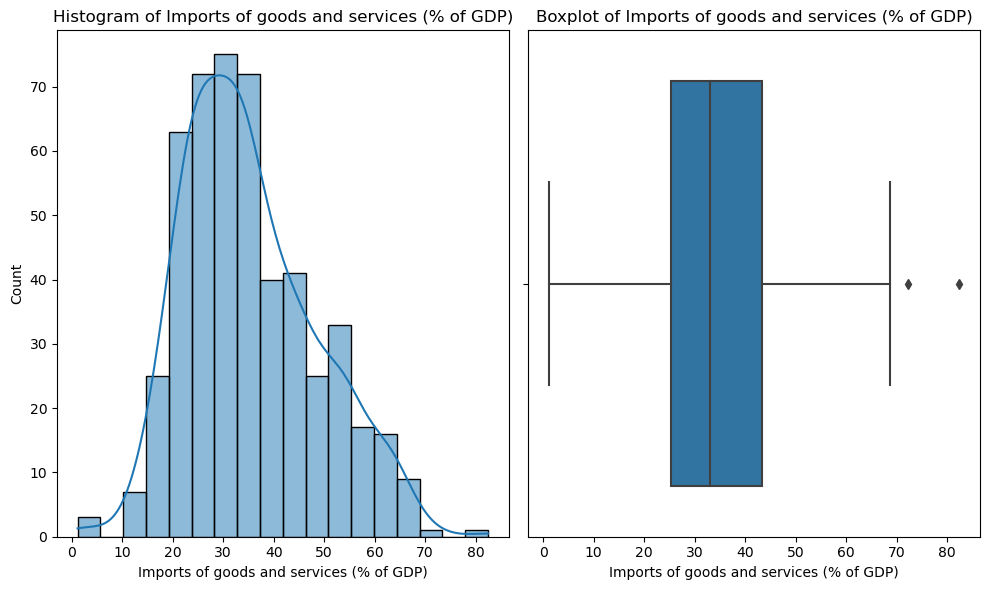

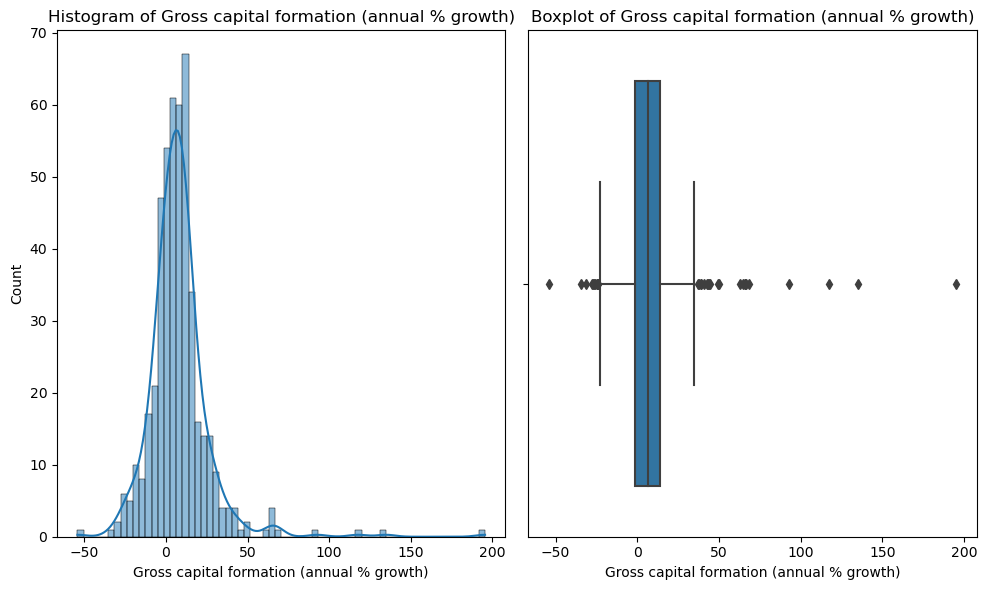

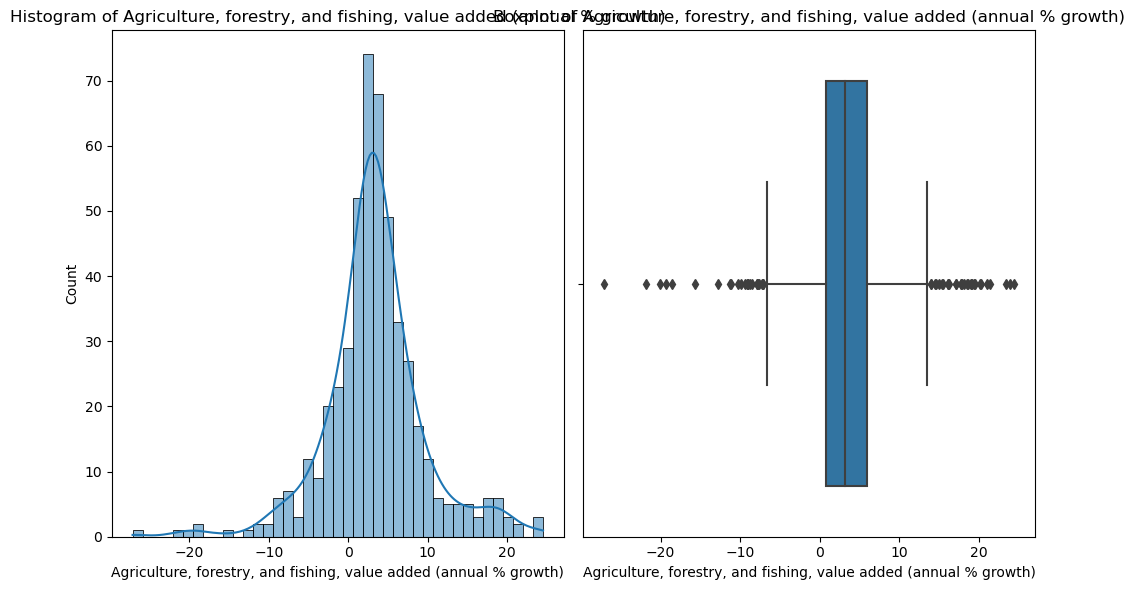

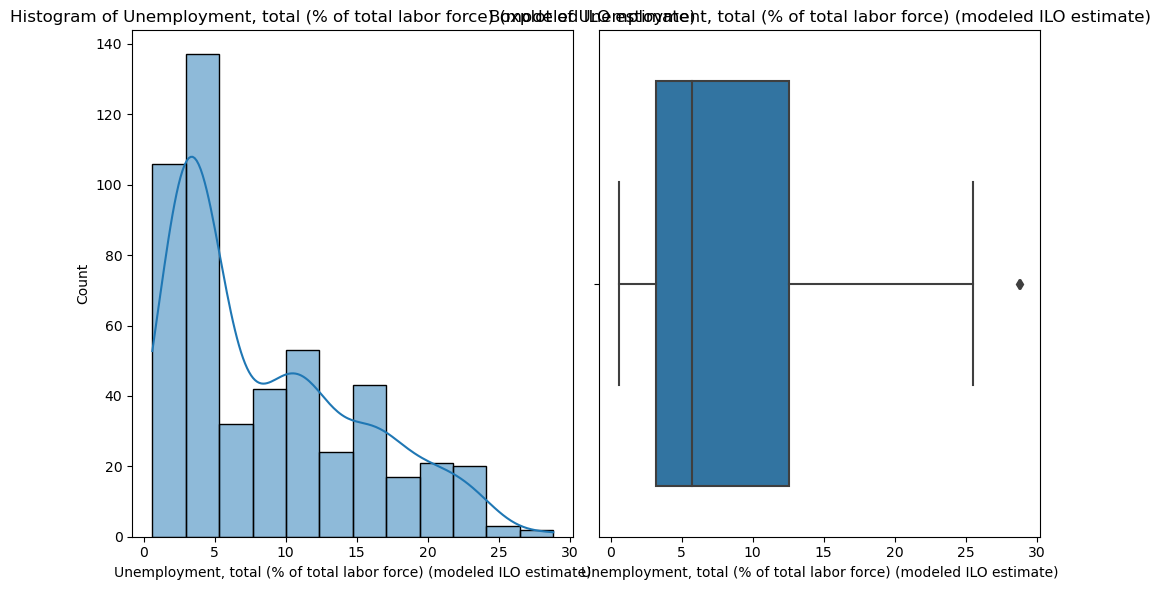

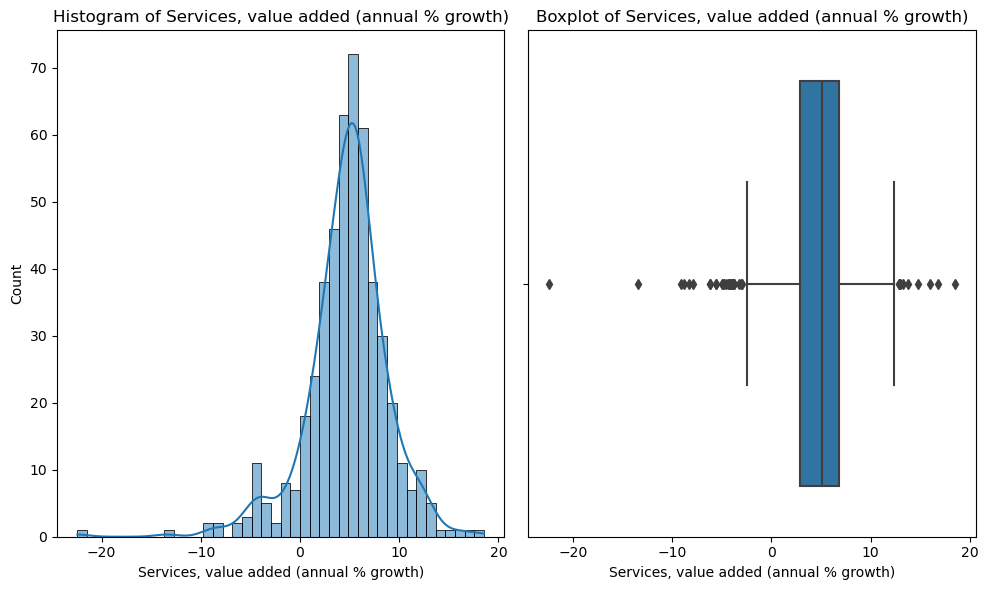

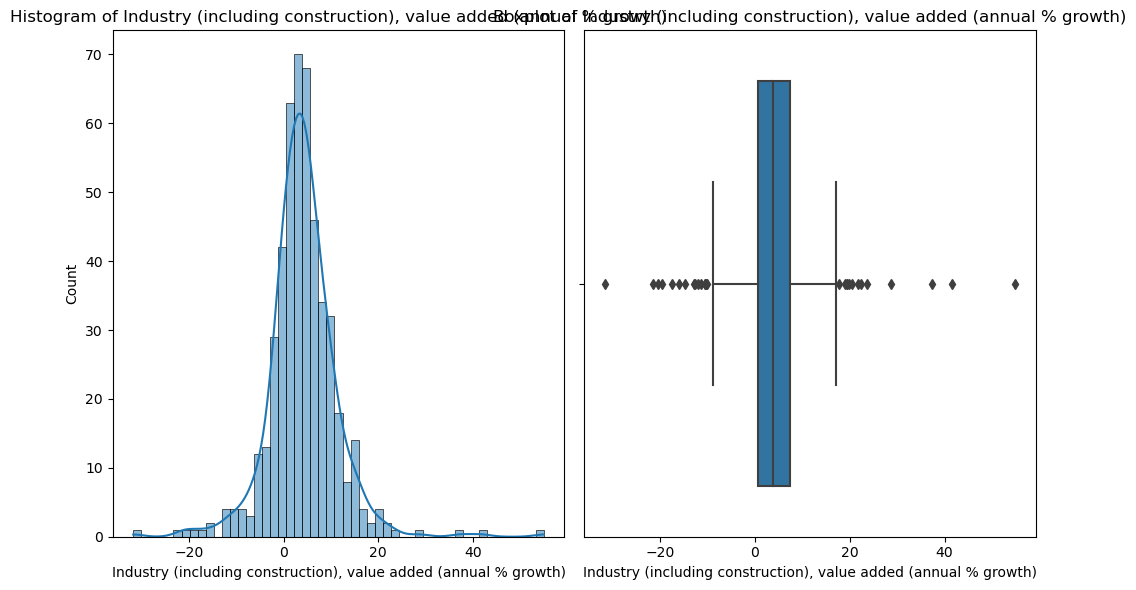

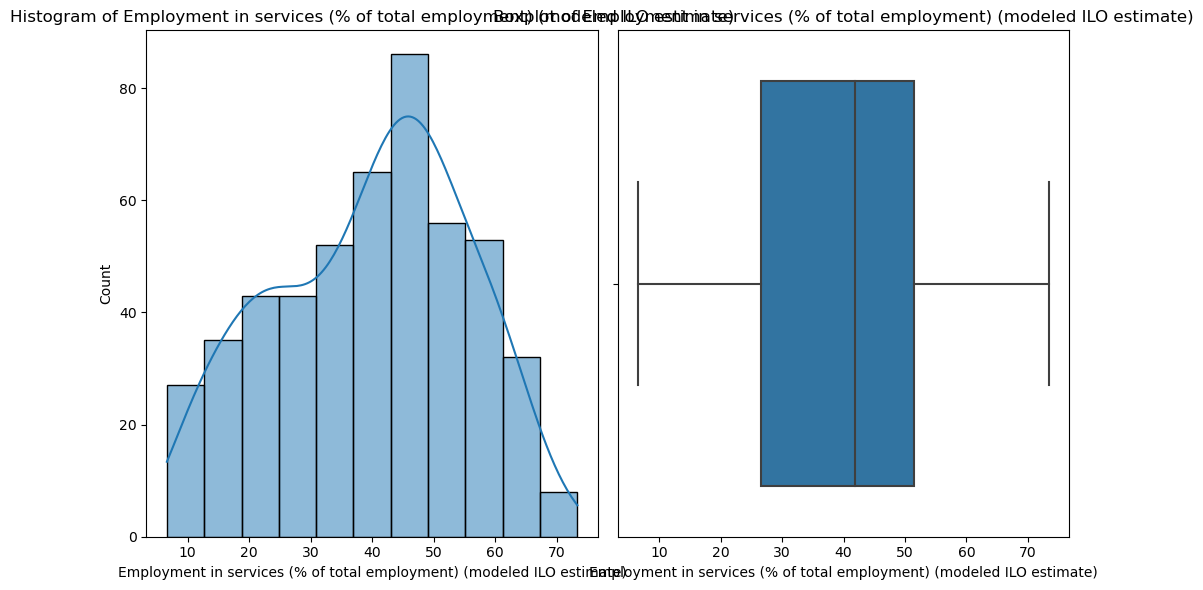

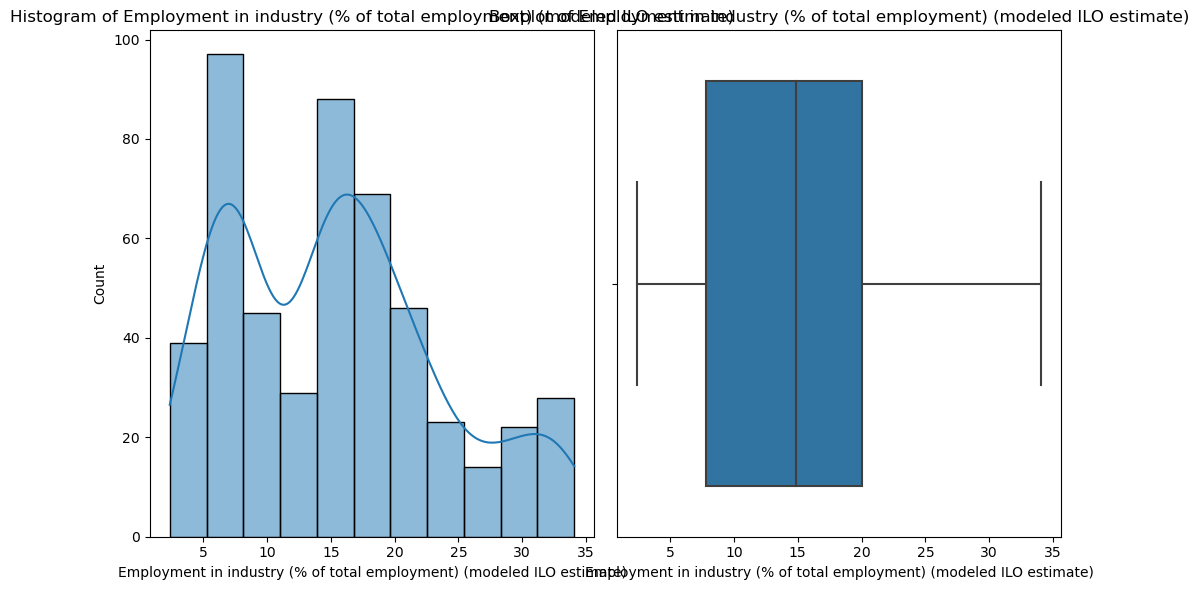

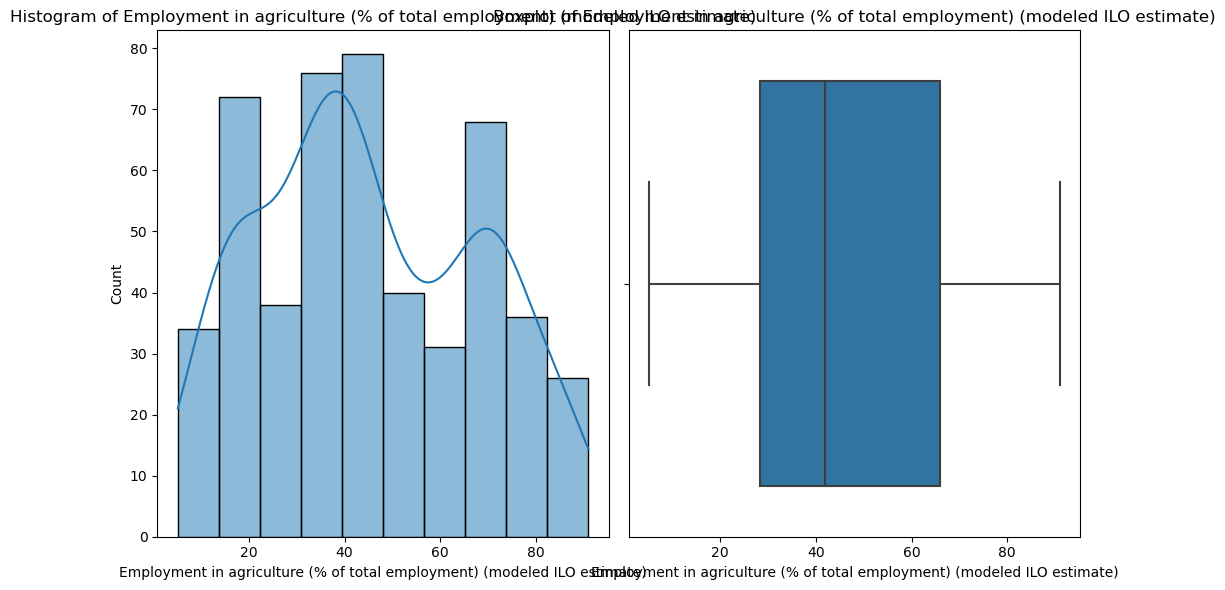

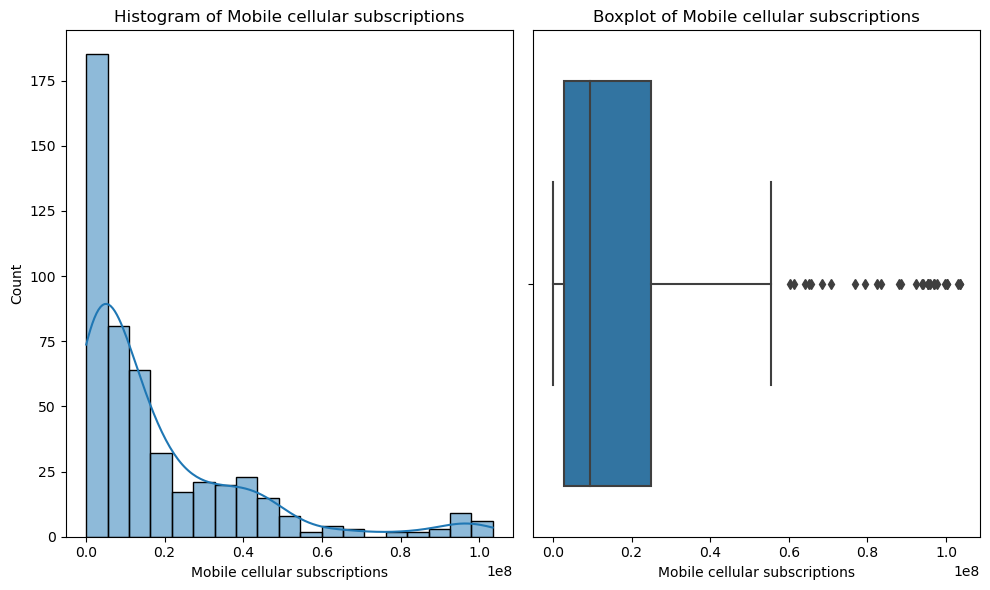

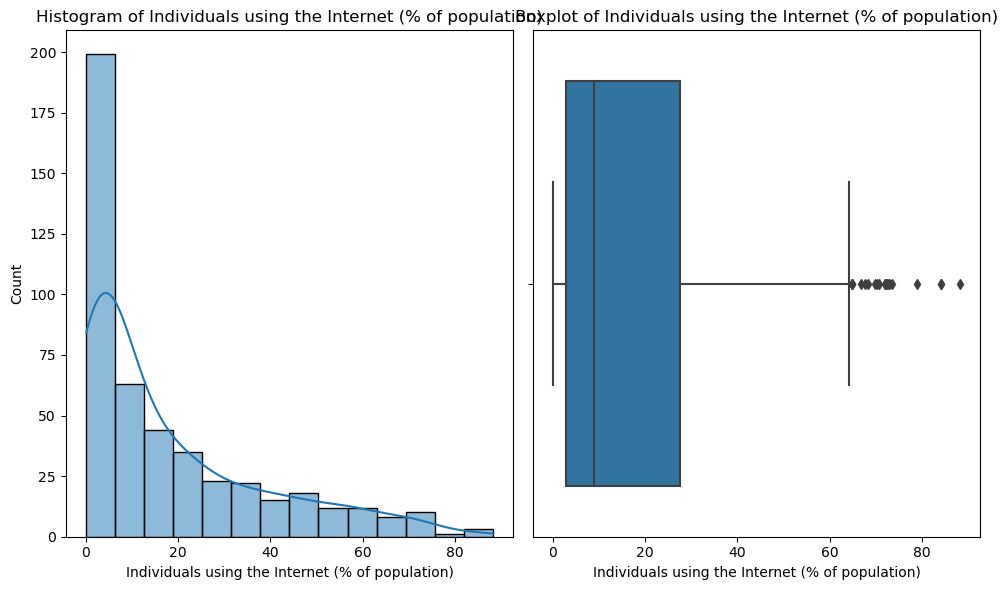

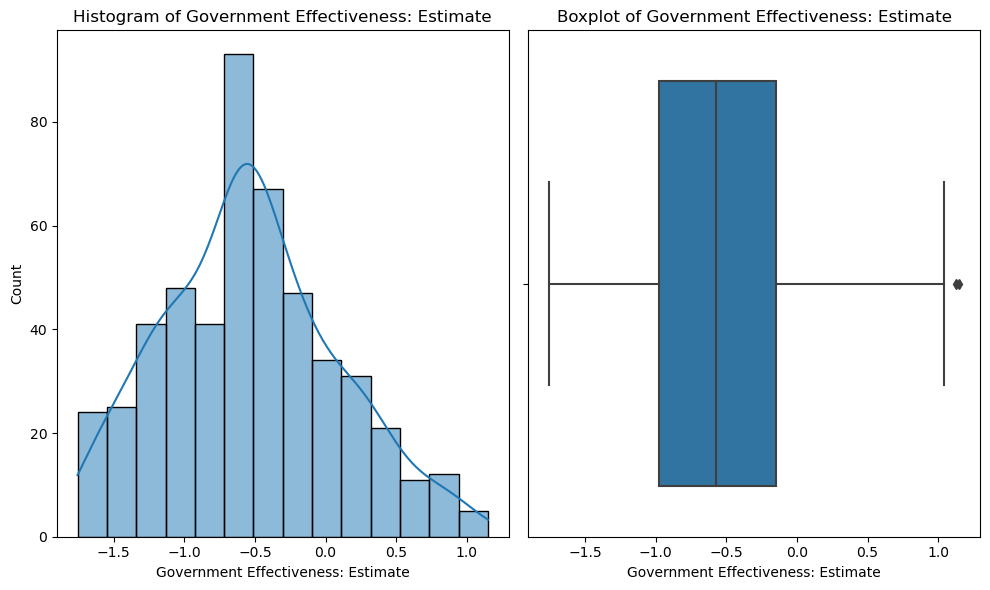

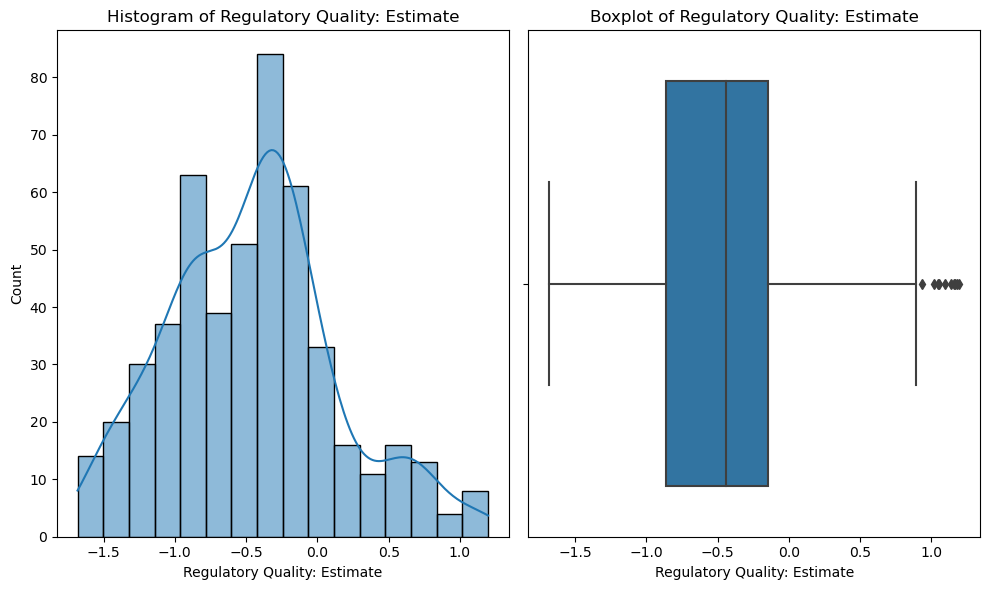

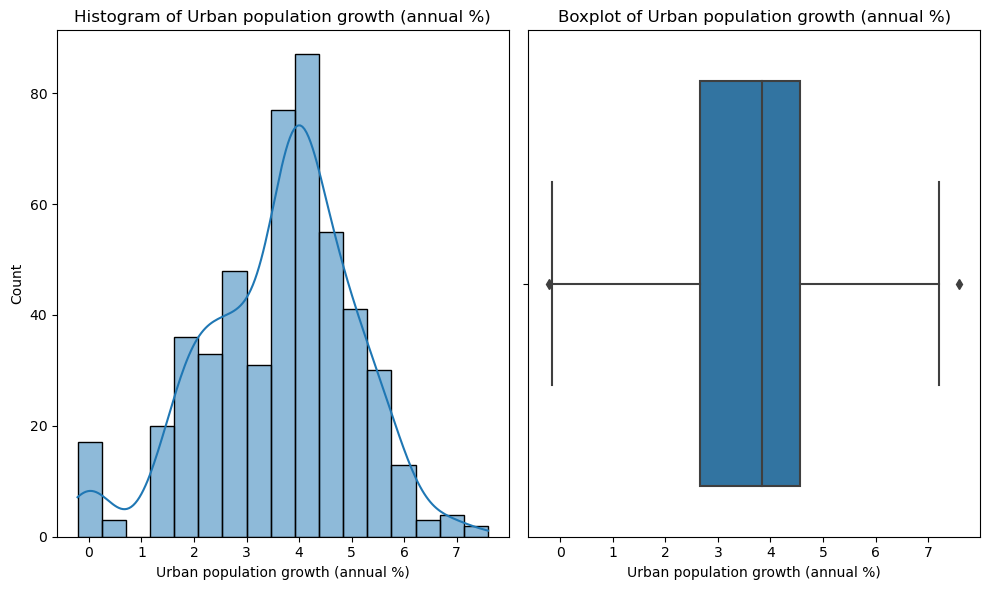

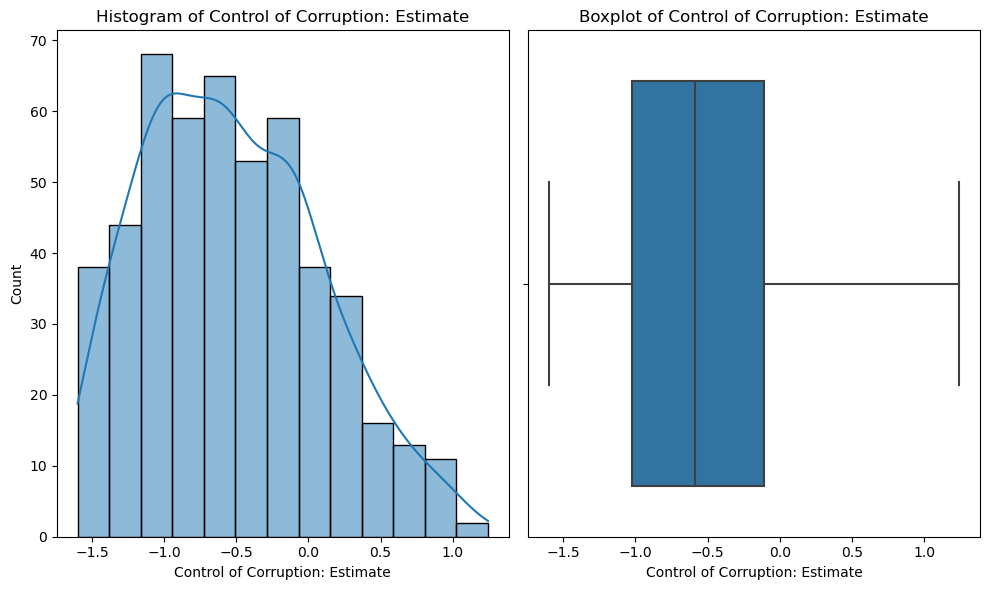

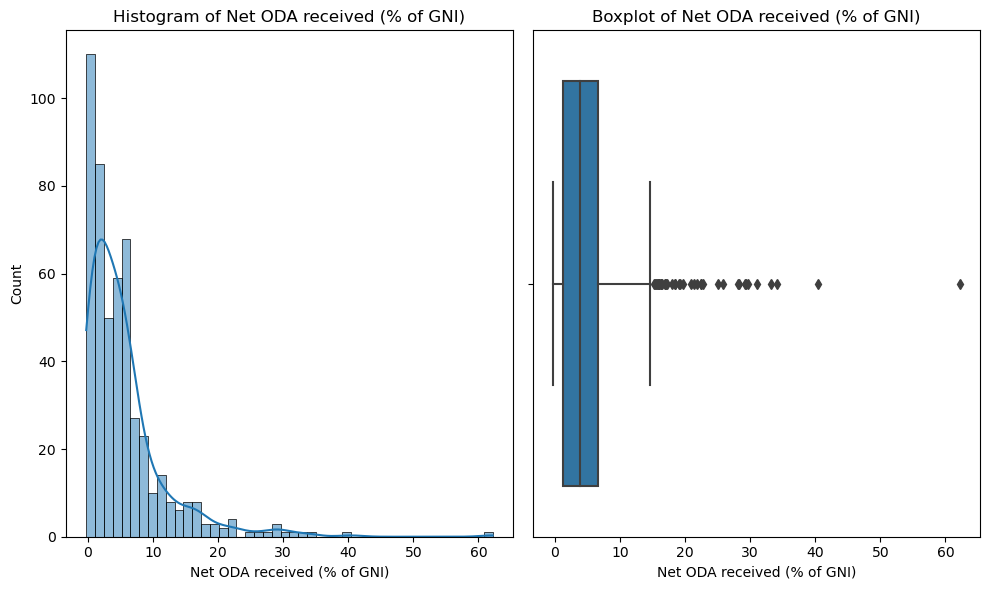

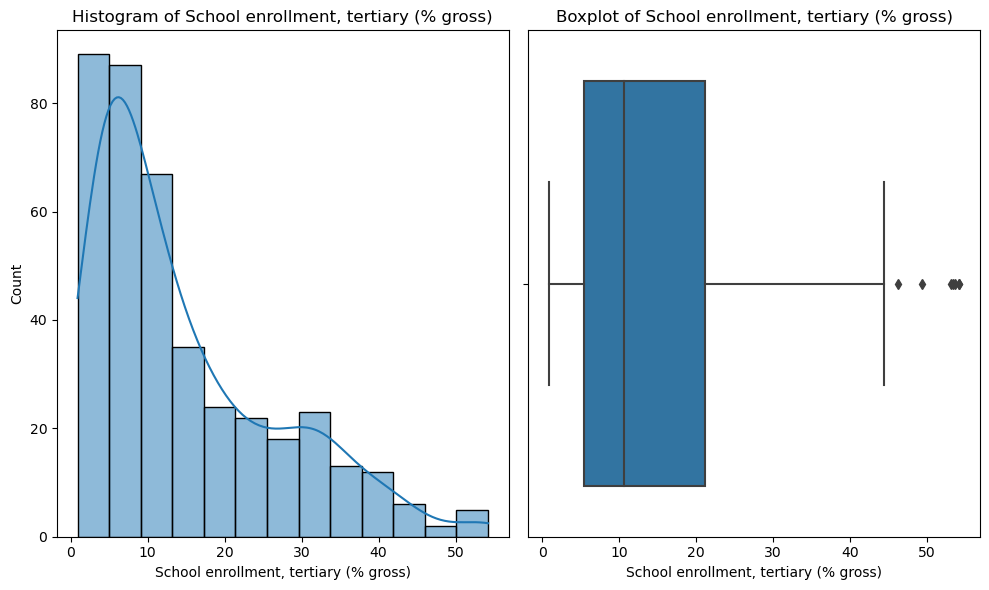

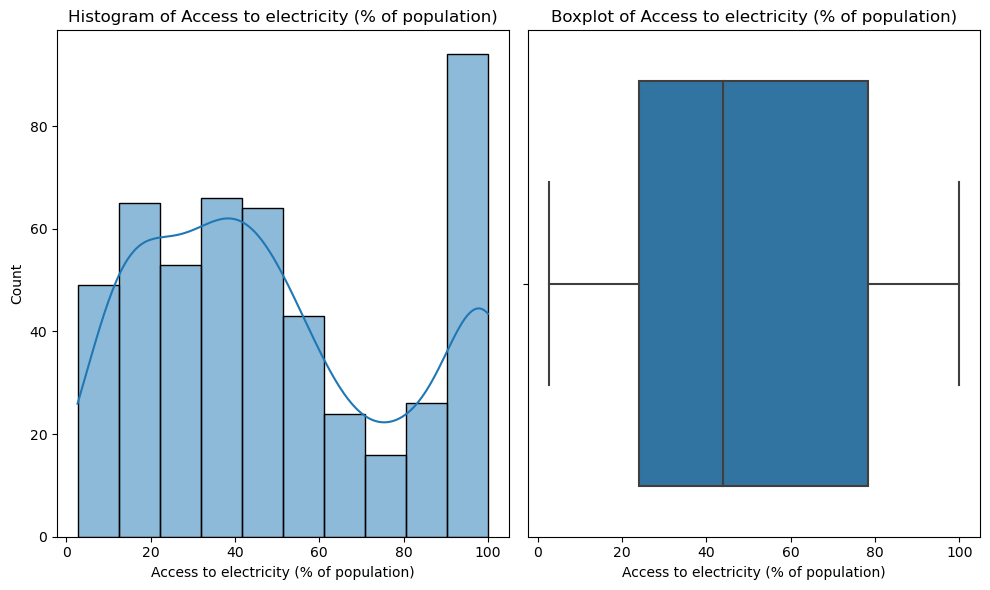

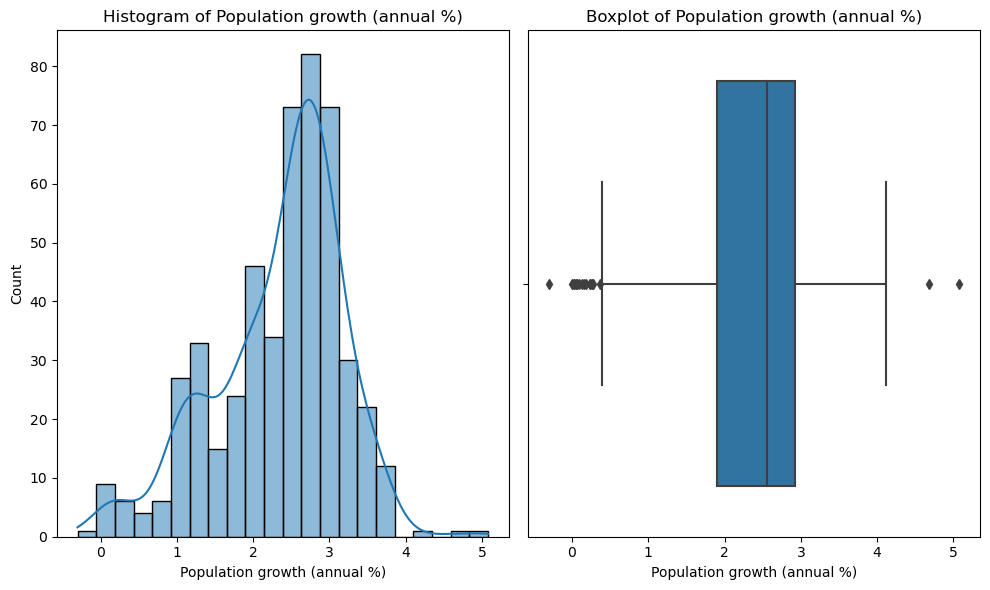

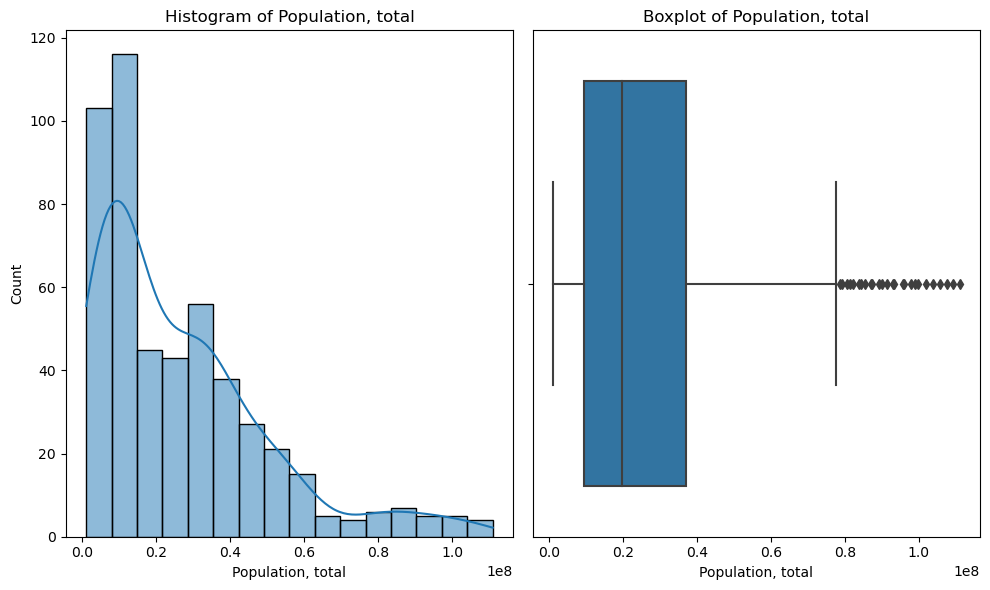

In [19]:
indicators = data.columns[2:]  

for indicator in indicators:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[indicator].dropna(), kde=True)
    plt.title(f'Histogram of {indicator}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[indicator].dropna())
    plt.title(f'Boxplot of {indicator}')
    
    plt.tight_layout()
    
    


In [20]:
import os

plot_dir = '/mnt/data/distribution_plots_subset'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

plt.figure()
sns.histplot([1, 2, 3, 4, 5], kde=True)
plt.title('Example Histogram')
plt.savefig(os.path.join(plot_dir, 'example_histogram.png'))
plt.close()



OSError: [Errno 30] Read-only file system: '/mnt'

In [ ]:
pwd

In [21]:
import os

current_directory = os.getcwd()
print(current_directory)


/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

indicators_subset = df.columns[3:8]  

plot_dir = '/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

for indicator in indicators_subset:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[indicator].dropna(), kde=True)
    plt.title(f'Histogram of {indicator}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[indicator].dropna())
    plt.title(f'Boxplot of {indicator}')
    
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f'{indicator}_distribution.png'))
    plt.close()

print(f"Plots saved to: {plot_dir}")


Plots saved to: /Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files
